# <center><span style="color:rgb(30, 92, 92);">**Customer Lifetime Value**</span><center>
**<center><span style="color:rgb(30, 92, 92);">Prediction with Regression Models</span><center>**


<center>Capstone Project Module 3</center>
<center>Afifa Kinasih Anggitan Mahanani JCDSOH01-001</center>

# <span style="color: #008080;">**I. Business Problem**</span>

## **1.1 Background**

Dalam industri asuransi otomotif, memprediksi Customer Lifetime Value (CLV) penting untuk menentukan strategi pemasaran, retensi pelanggan, dan alokasi anggaran yang tepat. CLV merupakan estimasi total nilai keuntungan yang dapat diperoleh perusahaan dari seorang pelanggan selama masa hubungan bisnis berlangsung. Dengan memanfaatkan data historis pelanggan, perusahaan ingin membangun <span style="color: #008080;">**model prediktif berbasis machine learning yang dapat memperkirakan nilai CLV**</span> serta mengungkap faktor-faktor utama yang memengaruhinya, guna meningkatkan profitabilitas dan efektivitas strategi bisnis.

## **1.2 Problem Statement**

Perusahaan asuransi otomotif kesulitan meningkatkan pendapatan karena strategi pemasaran belum mempertimbangkan nilai pelanggan. Anggaran promosi masih dibagi rata, sehingga kurang efisien dan cenderung menguntungkan pelanggan bernilai rendah. Perhitungan Customer Lifetime Value (CLV) juga masih dilakukan manual, lambat, dan tidak praktis. Untuk itu, dibutuhkan model prediktif berbasis machine learning yang mampu memperkirakan CLV secara akurat sekaligus mengidentifikasi faktor-faktor utama seperti jenis kendaraan, tipe asuransi, status pekerjaan, pendapatan, dan riwayat klaim, guna mendukung pengambilan keputusan yang lebih tepat dan profitabel.

## **1.3 Goals**

1. Membangun model machine learning berbasis supervised regression untuk memprediksi Customer Lifetime Value (CLV) seakurat mungkin pada pelanggan asuransi otomotif.
2. Menentukan faktor-faktor yang paling berpengaruh terhadap nilai CLV.

## **1.4 Methods**

### **Analytics Approach**

Pendekatan analitik yang digunakan dalam project ini mencakup serangkaian langkah terstruktur, mulai dari pemahaman data hingga pemilihan model terbaik. Berikut tahapan-tahapan analisis yang akan dilakukan:

1. Melakukan *Exploratory Data Analysis (EDA)* untuk memahami pola dan distribusi nilai CLV, serta hubungan antara fitur-fitur pelanggan dengan CLV.
2. Melakukan tahapan Data Preprocessing meliputi data cleaning dan data transformation.
3. Membangun dan menguji beberapa model supervised regression untuk memprediksi CLV
4. Melakukan evaluasi model menggunakan metrik regresi.
5. Melakukan benchmarking antar model untuk memilih model dengan performa terbaik pada dataset.
6. Melakukan hyperparameter tuning pada model terpilih untuk mengurangi error dan meningkatkan akurasi.
7. Melakukan analisis feature importance untuk mengidentifikasi variabel-variabel yang paling berpengaruh terhadap CLV, sebagai dasar pengambilan keputusan bisnis.

### **Metric Evaluation**

Untuk mengevaluasi performa model regresi dalam memprediksi CLV, akan digunakan beberapa metrik berikut:

* MAE (Mean Absolute Error): Mengukur rata-rata kesalahan absolut antara nilai prediksi dan nilai aktual CLV. Nilai lebih kecil menandakan prediksi lebih akurat.
* RMSE (Root Mean Squared Error): Akar dari rata-rata kuadrat error. Lebih sensitif terhadap outlier dibanding MAE.
* MAPE (Mean Absolute Percentage Error): Mengukur rata-rata kesalahan dalam bentuk persentase dari nilai aktual. Berguna untuk interpretasi relatif terhadap besarannya.
* R-squared (R²): Menunjukkan seberapa besar varians dalam data target (CLV) yang dapat dijelaskan oleh fitur input. Nilai mendekati 1 berarti model sangat baik.

<span style="color: #008080;">Semakin kecil nilai **MAE**, **RMSE**, dan **MAPE**, serta semakin mendekati 1 nilai **R²**</span>, maka semakin baik model dalam memprediksi nilai CLV pelanggan secara akurat dan stabil.

<span style="color: #008080;">**Import Library**</span>

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.preprocessing import OrdinalEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor


# ensemble various
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor

# ensemble similar
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier

# metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

# uji statistik
from scipy.stats import kruskal

# <span style="color: #008080;">**II. Data Understanding**</span>

Dataset: [Link](https://drive.google.com/drive/folders/154b8udQqDzofoCAAqSBI0KZ0cXHoYq8l?usp=drive_link)

Sebelum melakukan analisis dan pemodelan, tahap data understanding sangat penting untuk mengenali karakteristik, struktur, serta kualitas data yang tersedia. Pada tahap ini, kita akan mengeksplorasi dan memahami data agar proses preprocessing dan pemodelan berikutnya dapat berjalan efektif. Dengan pemahaman yang baik terhadap data, hasil analisis yang diperoleh akan lebih relevan dan sesuai dengan tujuan bisnis yang ingin dicapai.

## **2.1 Dataset Description & Features**

**Load Data**

In [52]:
df = pd.read_csv('data_customer_lifetime_value_raw.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


Dataset ini merupakan kumpulan data pelanggan asuransi mobil dari sebuah perusahaan. Ada 5669 baris dan 11 kolom, setiap baris merepresentasikan satu pelanggan lengkap dengan keterangan jenis kendaraan, status polis, jumlah premi, riwayat klaim, pendapatan, hingga nilai *Customer Lifetime Value* (CLV). Berikut ini adalah penjelasan dari setiap kolom:

| Kolom                    | Tipe Data | Tipe Data  | Penjelasan                                                                                                 | Relevansi terhadap Target                                                                                   |
|--------------------------|-----------|----------------|-----------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| Vehicle Class            | object    | Kategorikal    | Kategori jenis kendaraan yang dimiliki pelanggan (misal: Four-Door Car, Two-Door Car, Luxury SUV, dll).   | Jenis kendaraan dapat memengaruhi kebutuhan asuransi dan premi.                                            |
| Coverage                 | object    | Kategorikal    | Jenis perlindungan asuransi yang diambil pelanggan (Basic, Extended, Premium).                            | Jenis perlindungan memengaruhi besaran premi dan potensi klaim.                                            |
| Renew Offer Type         | object    | Kategorikal    | Tipe penawaran perpanjangan polis yang diberikan kepada pelanggan (Offer1, Offer2, dst).                  | Tipe penawaran dapat memengaruhi loyalitas dan nilai pelanggan.                                            |
| EmploymentStatus         | object    | Kategorikal    | Status pekerjaan pelanggan (Employed, Unemployed, Retired, dll).                                          | Status pekerjaan berkaitan dengan kemampuan membayar premi.                                                |
| Marital Status           | object    | Kategorikal    | Status pernikahan pelanggan (Single, Married, Divorced).                                                  | Status pernikahan dapat memengaruhi kebutuhan asuransi.                                                    |
| Education                | object    | Kategorikal    | Tingkat pendidikan terakhir pelanggan (High School, Bachelor, Master, dll).                               | Tingkat pendidikan berpotensi memengaruhi perilaku finansial.                                              |
| Number of Policies       | float64   | Numerikal      | Jumlah polis asuransi yang dimiliki oleh pelanggan.                                                        | Jumlah polis menunjukkan loyalitas dan potensi nilai pelanggan.                                            |
| Monthly Premium Auto     | float64   | Numerikal      | Besaran premi asuransi mobil yang dibayarkan pelanggan setiap bulan.                                       | Premi bulanan berhubungan langsung dengan pendapatan perusahaan dari pelanggan.                            |
| Total Claim Amount       | float64   | Numerikal      | Total nilai klaim yang pernah diajukan oleh pelanggan.                                                     | Total klaim memengaruhi profitabilitas dan nilai pelanggan.                                                |
| Income                   | float64   | Numerikal      | Pendapatan tahunan pelanggan.                                                                              | Pendapatan memengaruhi kemampuan membeli produk asuransi.                                                  |
| Customer Lifetime Value  | float64   | Numerikal      | Nilai total keuntungan yang diperkirakan akan diperoleh perusahaan dari pelanggan selama menjadi nasabah.  | Target yang diprediksi: total nilai keuntungan dari pelanggan.                                             |


Berdasarkan relevansi dengan target, seluruh kolom selain CLV akan digunakan sebagai fitur (variabel input), sedangkan kolom CLV akan menjadi target yang diprediksi oleh model. Pada tahapan EDA setelah ini, akan dilihat lebih detail mengenai distribusi data, hubungan antar fitur, hubungan fitur dengan target, dan temuan-temuan awal sebelum dilakukan pemodelan lebih lanjut.

## **2.2 Exploratory Data Analysis (EDA)**

### **Data Overview**

In [36]:
pd.DataFrame({
    'column': df.columns.values,
    'NaN_value(%)': df.isna().mean().values * 100,
    '0_value(%)': [(df[col] == 0).mean() * 100 if df[col].dtype != 'O' else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'n_unique': df.nunique().values,
    'unique': [df[col].unique() for col in df.columns]}
).round(2)

,column,NaN_value(%),0_value(%),duplicate,n_unique,unique
0,Vehicle Class,0.0,0.00,618,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car,..."
1,Coverage,0.0,0.00,618,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,0.0,0.00,618,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,0.0,0.00,618,5,"[Retired, Employed, Disabled, Medical Leave, U..."
4,Marital Status,0.0,0.00,618,3,"[Divorced, Married, Single]"
5,Education,0.0,0.00,618,5,"[High School or Below, College, Master, Bachel..."
6,Number of Policies,0.0,0.00,618,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,0.0,0.00,618,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ..."
8,Total Claim Amount,0.0,0.00,618,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355..."
9,Income,0.0,25.21,618,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ..."


Dari data overview diperoleh informasi:

- Tidak ada nilai NaN di seluruh kolom, tidak ada juga kata yang mengindikasikan nilai kosong di kolom kategorikal (misal: "unknown", "?", dsb).
- Ada 25,2% nilai 0 pada kolom Income, ini informasi penting. Kemungkinan pelanggan yang memang mengisi 0 dan berhubungan dengan Employment Status atau data tidak tersedia (error). Perlu <span style="color: #008080;">**analisis dan penanganan missing value ini di tahap Data Preprocessing**</span> melakukan modeling. 
- Terdapat 618 baris duplikat(10,9%) yang harus <span style="color: #008080;">**dihapus agar distribusi data tidak bias dan menghindari overfitting model.**</span> 
- Nilai unik tinggi pada Total Claim Amount dan Monthly Premium Auto, menandakan bahwa jumlah klaim dan nilai premi bersifat sangat spesifik antar pelanggan.
- Nilai unik / jumlah kategori pada kolom kategorikal memiliki jumlah kategori yg wajar (3-6), sehingga cocok untuk <span style="color: #008080;">**encoding tanpa risiko terjadinya sparse data yang berlebihan.**</span>
- Kolom CLV memiliki 5049 nilai unik (sesuai dengan total baris - baris duplikat) yang menunjukkan bahwa <span style="color: #008080;">**CLV berbeda antar pelanggan.**</span>. -> Memang cocok untuk dijadikan target prediksi.

### **Descriptive Summary**

In [37]:
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


Insight:

- Data numerikal menunjukkan adanya outlier dan variasi yang tinggi, terutama pada CLV, Income, dan Total Claim Amount.
- Perlu penanganan khusus pada nilai Income = 0 dan outlier pada tahap preprocessing.
- Distribusi kategori pada fitur kategorikal cukup baik untuk pemodelan.
- Rata-rata CLV sekitar 8004.94 dengan standar deviasi 6870.97, menunjukkan variasi CLV yang cukup besar antar pelanggan.
- Income memiliki nilai minimum 0, median sekitar 33889.00, dan rata-rata 37657.38. Banyak pelanggan berpenghasilan rendah atau tidak mengisi data pendapatan.
- Monthly Premium Auto dan Total Claim Amount juga menunjukkan variasi yang tinggi, menandakan perbedaan kebutuhan dan perilaku klaim antar pelanggan.
- Number of Policies rata-rata 2.75, artinya sebagian besar pelanggan hanya memiliki 1-2 polis.

Seletah ini, akan dibuat salinan dataset dengan baris duplikat yang sudah terhapus untuk keperluan EDA, kita akan melihat distribusi data dan mengidentifikasi pola, anomali, serta hubungan antar variabel yang dapat memengaruhi nilai *Customer Lifetime Value* (CLV). Penanganan duplikat, missing value, outlier dari dataset asli akan dilakukan di tahap Data Preprocessing.

### **Distribution Analysis**

In [38]:
# Membuat salinan dataset tanpa baris duplikat untuk keperluan EDA
df_eda = df.drop_duplicates().copy()
df_eda.shape

(5051, 11)

In [39]:
num_features = df_eda.select_dtypes(include='number').drop('Customer Lifetime Value', axis=1).columns
cat_features = df_eda.select_dtypes(include='object').columns

**Distribusi CLV :**

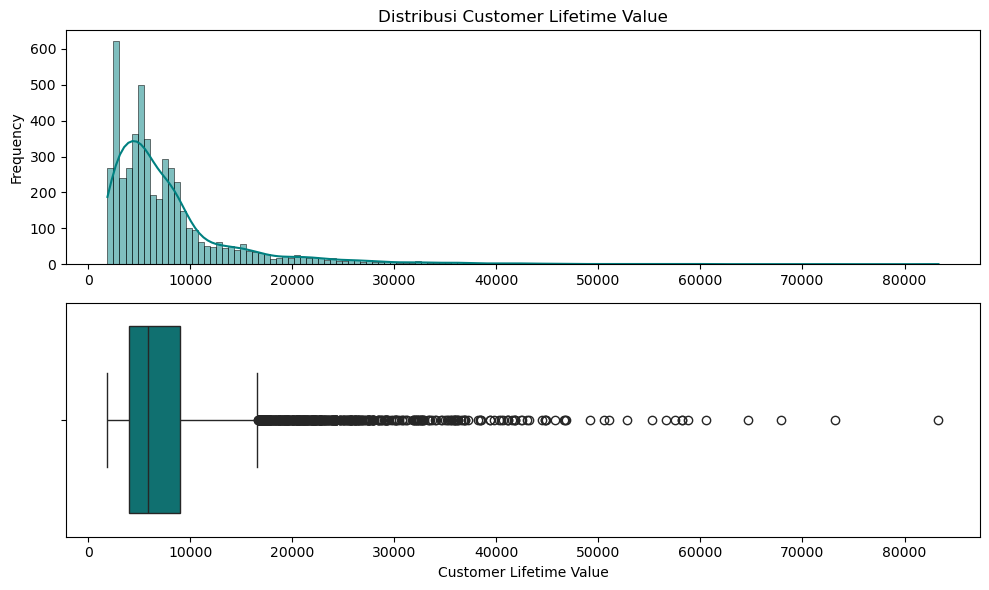

In [40]:
plt.figure(figsize=(10, 6))

# Subplot 1: Histogram
plt.subplot(2, 1, 1)
sns.histplot(df_eda['Customer Lifetime Value'], kde=True, color='teal')
plt.title('Distribusi Customer Lifetime Value')
plt.xlabel('')
plt.ylabel('Frequency')

# Subplot 2: Boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=df_eda['Customer Lifetime Value'], color='teal')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('')

plt.tight_layout()
plt.show()


Menunjukkan variasi yang sangat besar antar pelanggan, dengan sebagian besar pelanggan memiliki CLV di bawah rata-rata, namun terdapat beberapa pelanggan dengan CLV sangat tinggi (outlier). Hal ini terlihat dari distribusi yang cenderung skewed ke kanan <span style="color: #008080;">**(right-skewed)**</span>, di mana mayoritas pelanggan memiliki CLV rendah hingga sedang, dan hanya sedikit pelanggan dengan CLV sangat tinggi. Rata-rata CLV sekitar 8000, namun nilai maksimum jauh lebih besar dari median, menandakan adanya variasi dan potensi pelanggan bernilai sangat tinggi bagi perusahaan.

Coba kita lihat bagaimana karakteristik pelanggan yang menjadi outlier tinggi ini.

In [41]:
# Pelanggan dengan CLV outlier tinggi (misal: di atas persentil 99)
clv_threshold = df_eda['Customer Lifetime Value'].quantile(0.99)
outlier_high = df_eda[df_eda['Customer Lifetime Value'] > clv_threshold]

display(outlier_high.describe(include='all').T)
outlier_high.head()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Vehicle Class,51,5,SUV,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,51,3,Extended,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Renew Offer Type,51,4,Offer1,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,51,4,Employed,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital Status,51,3,Married,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,51,5,College,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Policies,51.0,NaN,NaN,NaN,2.0,0.0,2.0,2.0,2.0,2.0,2.0
Monthly Premium Auto,51.0,NaN,NaN,NaN,160.039216,46.47234,105.0,120.5,136.0,198.0,283.0
Total Claim Amount,51.0,NaN,NaN,NaN,731.790039,441.139707,111.173021,430.020436,696.9628,960.0,2552.343856
Income,51.0,NaN,NaN,NaN,44047.686275,28165.068013,0.0,23909.0,46587.0,64013.5,99875.0


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
76,Sports Car,Premium,Offer3,Employed,Single,High School or Below,2.0,144.0,820.431905,49259.0,44520.13577
114,SUV,Premium,Offer2,Employed,Married,College,2.0,161.0,772.800000,48367.0,57520.50151
199,Luxury Car,Extended,Offer2,Employed,Married,College,2.0,209.0,1003.200000,21988.0,41075.42879
235,Luxury SUV,Premium,Offer4,Employed,Married,College,2.0,283.0,1358.400000,77237.0,56675.93768
266,SUV,Basic,Offer1,Employed,Single,Master,2.0,119.0,571.200000,66661.0,42561.63183


Karakteristik Pelanggan dengan CLV Outlier Tinggi (> Persentil 99): 

- Hampir seluruh pelanggan outlier tinggi memiliki <span style="color: #008080;">**Number of Policies = 2**.</span>
- Mayoritas berasal dari kelas kendaraan <span style="color: #008080;">**SUV, Luxury SUV, Luxury Car, dan Sports Car**.</span>
- Sebagian besar mengambil Coverage <span style="color: #008080;">**Premium atau Extended**.</span>
- Status pekerjaan didominasi oleh <span style="color: #008080;">**Employed**</span>, namun ada juga yang Unemployed dengan CLV tinggi (kemungkinan pensiunan).
- Pendidikan bervariasi, namun mayoritas <span style="color: #008080;">**College**.</span>
- Rata-rata pendapatan (Income) pelanggan outlier tinggi juga lebih tinggi dari rata-rata populasi, meskipun ada beberapa dengan income 0 (kemungkinan unemployed).
- Nilai <span style="color: #008080;">**Monthly Premium Auto** dan **Total Claim Amount**</span> juga cenderung tinggi.

**Distribusi Fitur Numerikal :**

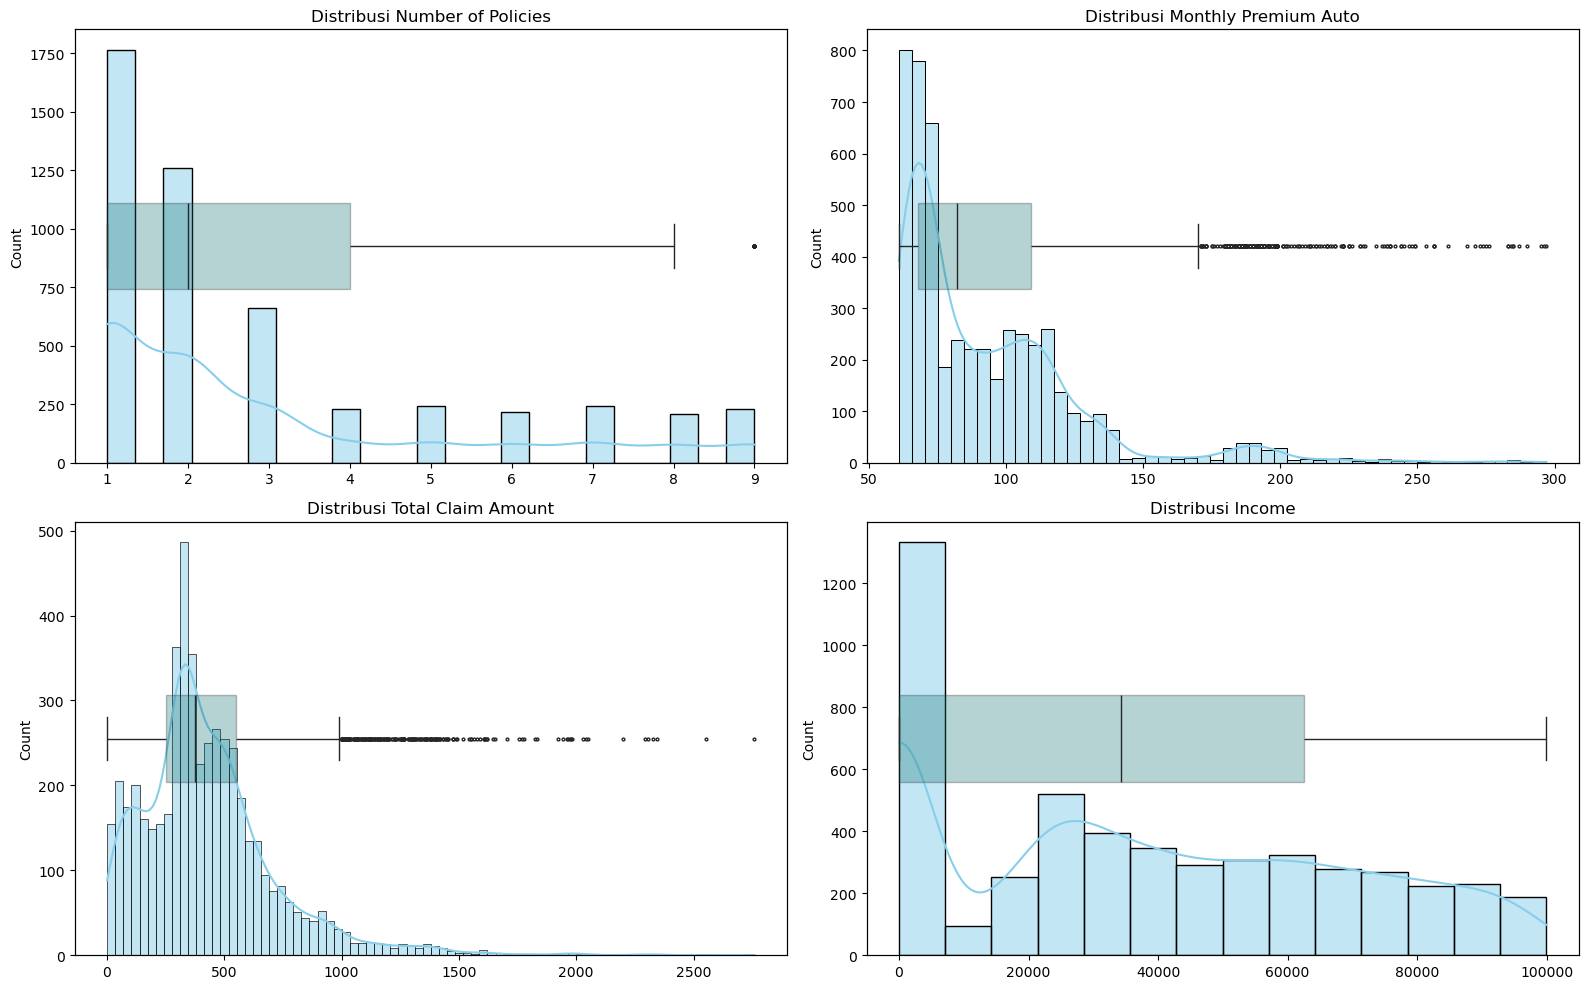

In [42]:
# Distribusi dan boxplot fitur numerikal
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for i, col in enumerate(num_features):
    # Histogram
    axes[i//2, i%2].set_title(f'Distribusi {col}')
    sns.histplot(df_eda[col], kde=True, ax=axes[i//2, i%2], color='skyblue')
    axes[i//2, i%2].set_xlabel('')
    # Boxplot (di bawah histogram)
    ax2 = axes[i//2, i%2].twinx()
    sns.boxplot(x=df_eda[col], ax=ax2, color='teal', width=0.2, fliersize=2, boxprops=dict(alpha=0.3))
    ax2.set_ylabel('')
    ax2.set_yticks([])
plt.tight_layout()
plt.show()

- Seluruh fitur numerikal memiliki variasi yang cukup tinggi, terlihat dari selisih antara nilai minimum, median, rata-rata, dan maksimum.
- Number of Policies mayoritas bernilai rendah (median 2), namun ada pelanggan dengan polis lebih banyak.
- Monthly Premium Auto dan Total Claim Amount menunjukkan distribusi right-skewed, dengan sebagian besar pelanggan membayar premi dan klaim dalam jumlah kecil, namun ada outlier dengan nilai sangat tinggi.
- Income memiliki nilai minimum 0 pada sekitar seperempat data, kemungkinan karena pelanggan tidak bekerja atau tidak mengisi data pendapatan. Median dan rata-rata income cukup berbeda, menandakan adanya outlier income tinggi.
- <span style="color: #008080;">**Seluruh fitur numerikal mengandung outlier** </span>, sehingga perlu penanganan khusus pada tahap preprocessing agar model tidak bias.


**Distribusi Fitur Kategorikal :**

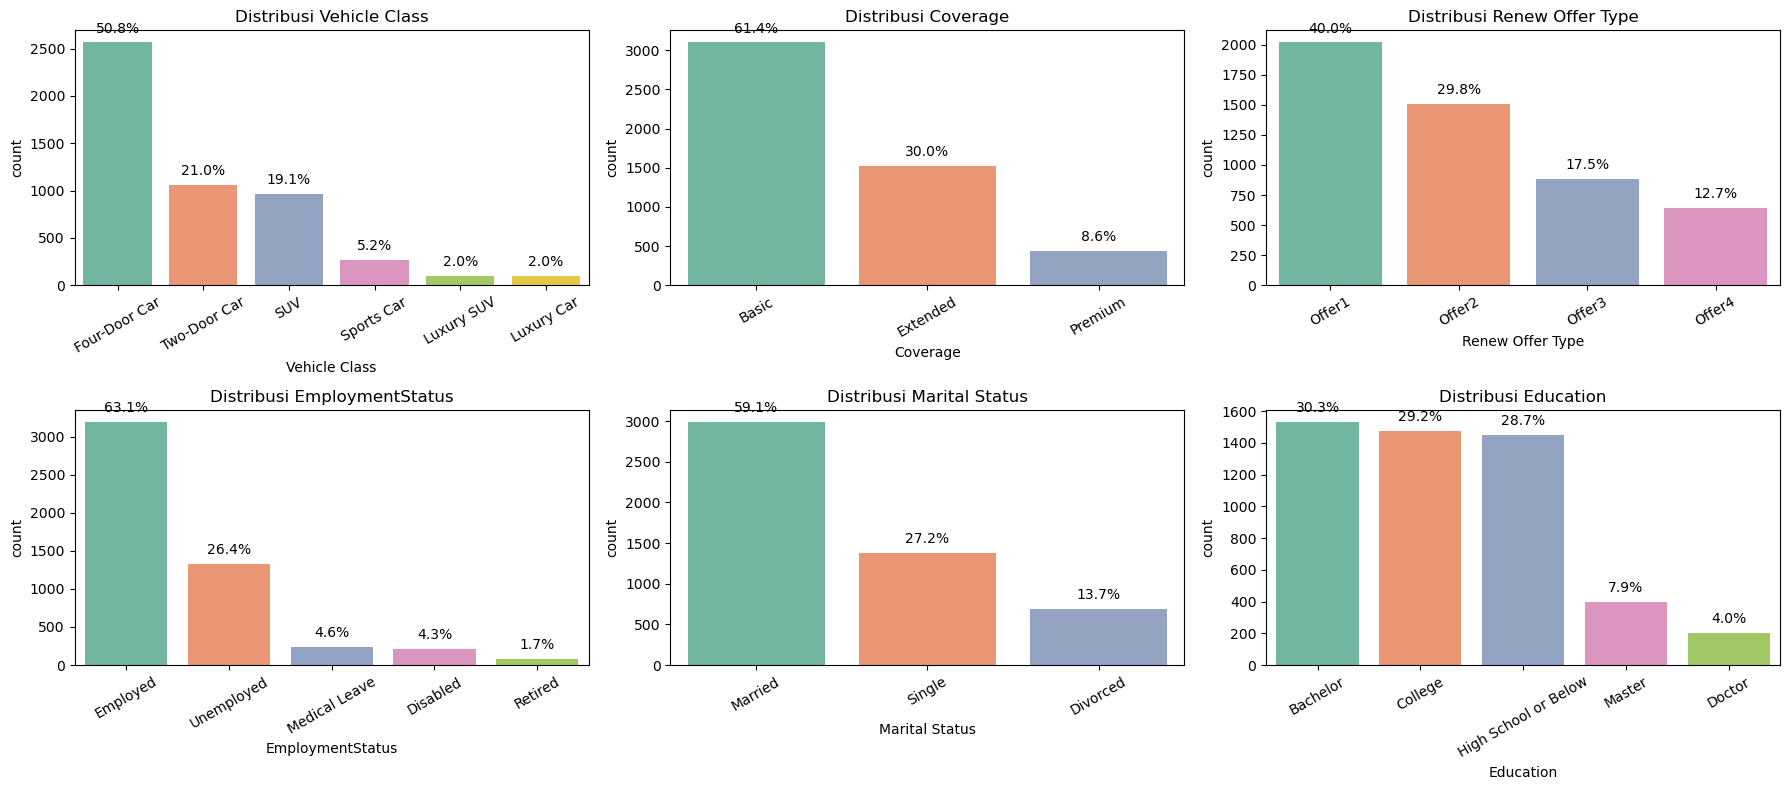

In [43]:
# Distribusi fitur kategorikal
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
for ax, col in zip(axes.flatten(), cat_features):
    # Plot count
    total = len(df_eda)
    order = df_eda[col].value_counts().index  # optional: untuk urutannya sesuai frekuensi
    sns.countplot(data=df_eda, x=col, ax=ax, palette='Set2', order=order)

    # persentase pada tiap bar
    for p in ax.patches:
        height = p.get_height()
        percentage = f'{(height / total * 100):.1f}%'
        ax.annotate(percentage,
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    ax.set_title(f'Distribusi {col}')
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

- Vehicle Class didominasi oleh Four-Door Car dan SUV, namun kategori lain seperti Luxury SUV, Sports Car, dan Two-Door Car juga cukup signifikan.
- Coverage paling banyak diambil adalah Basic, diikuti Extended dan Premium.
- Renew Offer Type tersebar merata pada Offer1 hingga Offer4, menandakan variasi strategi penawaran.
- EmploymentStatus didominasi oleh Employed, namun ada juga Unemployed, Retired, Medical Leave, dan Disabled.
- Marital Status mayoritas Married, namun Single dan Divorced juga cukup banyak.
- Eduaction mayoritas Bachelor, diikuti oleh College dan High School or Below, yang secara total mencakup hampir 90% populasi. Sementara itu, Master dan Doctor tergolong minoritas. Distribusi ini menunjukkan bahwa pelanggan asuransi mobil lebih banyak berasal dari jenjang pendidikan menengah hingga sarjana, sehingga strategi pemasaran dapat difokuskan pada segmen pendidikan tersebut.
- <span style="color: #008080;">**Tidak ada kategori yang terlalu sedikit atau terlalu banyak**</span> sehingga aman untuk proses encoding dan modeling.

### **Feature-Target Relationship Analysis**

Selanjutnya, akan dianalisis hubungan antara fitur dan target. Hubungan target dengan fitur numerikal akan dianalisis menggunakan scatter plot, boxplot, korelasi spearman. Sedangkan hubungan target dengan fitur kategorikal akan dianalisis menggunakan barplot, boxplot, Kruskal-Wallis. Untuk melihat hubungan beberapa fitur numerik dengan CLV juga bisa menggunakan Pairplot.

**Hubungan CLV dengan fitur numerikal**

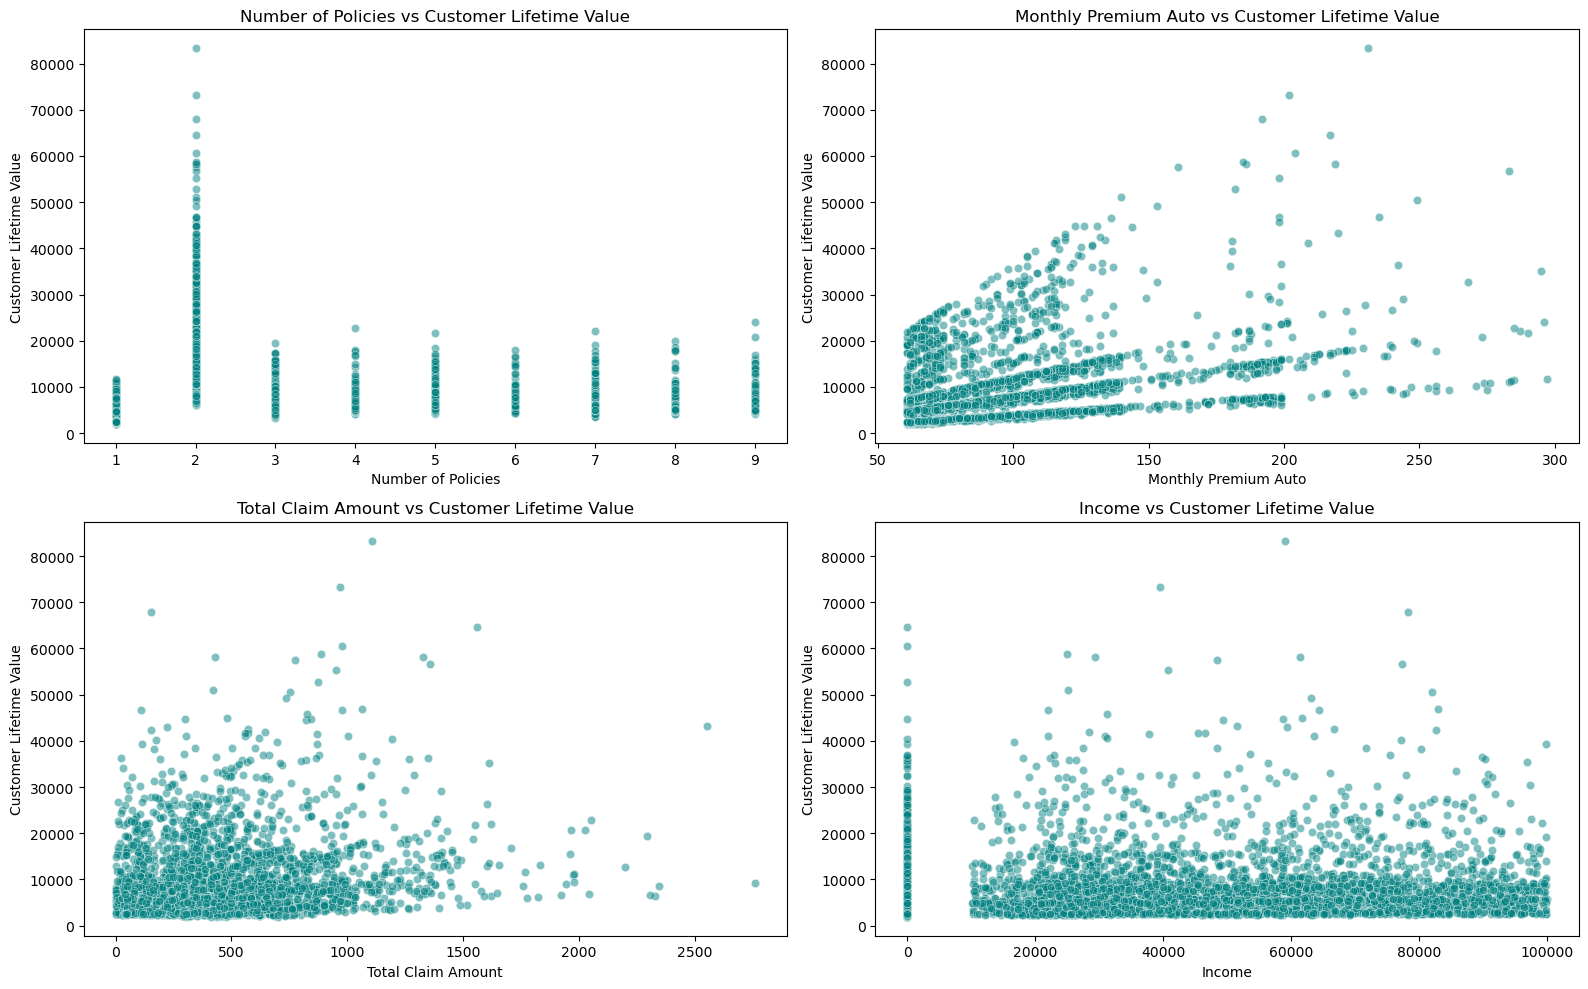

In [48]:
# Visualisasi hubungan fitur numerik dengan Customer Lifetime Value (CLV)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
for i, col in enumerate(num_features):
    ax = axes[i//2, i%2]
    sns.scatterplot(data=df_eda, x=col, y='Customer Lifetime Value', alpha=0.5, ax=ax, color='teal')
    ax.set_title(f'{col} vs Customer Lifetime Value')
    ax.set_ylabel('Customer Lifetime Value')
    ax.set_xlabel(col)
plt.tight_layout()
plt.show()

Berikut korelasi antara fitur numerik:

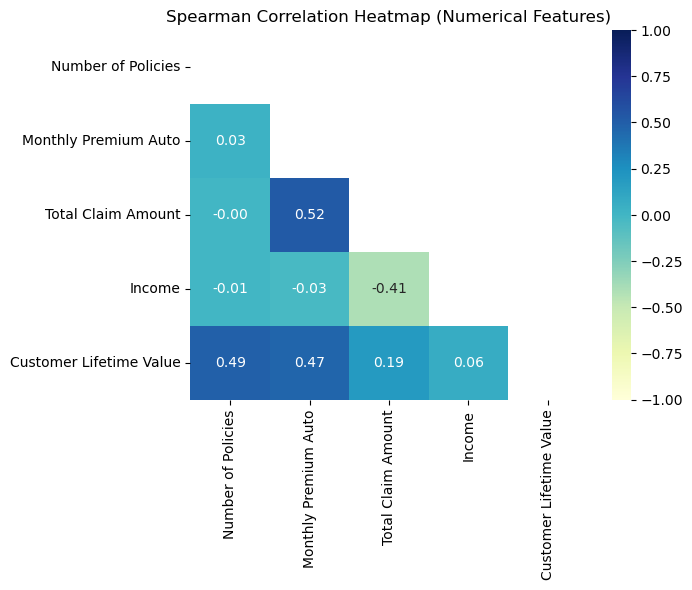

In [49]:
# Korelasi Spearman antar fitur numerik (termasuk CLV)
corr_spearman = df_eda[num_features.tolist() + ['Customer Lifetime Value']].corr(method='spearman')
mask = np.triu(corr_spearman)

sns.heatmap(corr_spearman, annot=True, cmap='YlGnBu', fmt='.2f', vmin=-1, vmax=1, mask=mask)
plt.title('Spearman Correlation Heatmap (Numerical Features)')
plt.show()

Kesimpulan hubungan antar fitur numerik: 

- Terdapat korelasi positif antara Number of Policies, Monthly Premium Auto, dan Total Claim Amount dengan CLV.
- Pelanggan dengan jumlah polis lebih banyak, premi bulanan lebih tinggi, dan total klaim lebih besar cenderung memiliki CLV yang lebih tinggi.
- Distribusi CLV sangat right-skewed, dengan sebagian besar pelanggan memiliki CLV rendah hingga sedang, dan hanya sedikit pelanggan dengan CLV sangat tinggi (outlier).
- Income tidak menunjukkan pola hubungan yang kuat dengan CLV, terlihat dari sebaran data yang menyebar di seluruh rentang CLV.
- Hubungan antar fitur numerikal lainnya juga tidak terlalu kuat, kecuali antara Monthly Premium Auto dan Total Claim Amount yang menunjukkan korelasi sedang.
- Outlier pada fitur numerikal terutama berasal dari pelanggan dengan CLV sangat tinggi, yang juga cenderung memiliki nilai tinggi pada fitur numerikal lain.
- Secara umum, fitur <span style="color: #008080;">**Number of Policies, Monthly Premium Auto, dan Total Claim Amount berpotensi menjadi prediktor untuk model prediksi CLV.**</span>

**Hubungan CLV dengan fitur kategorikal**

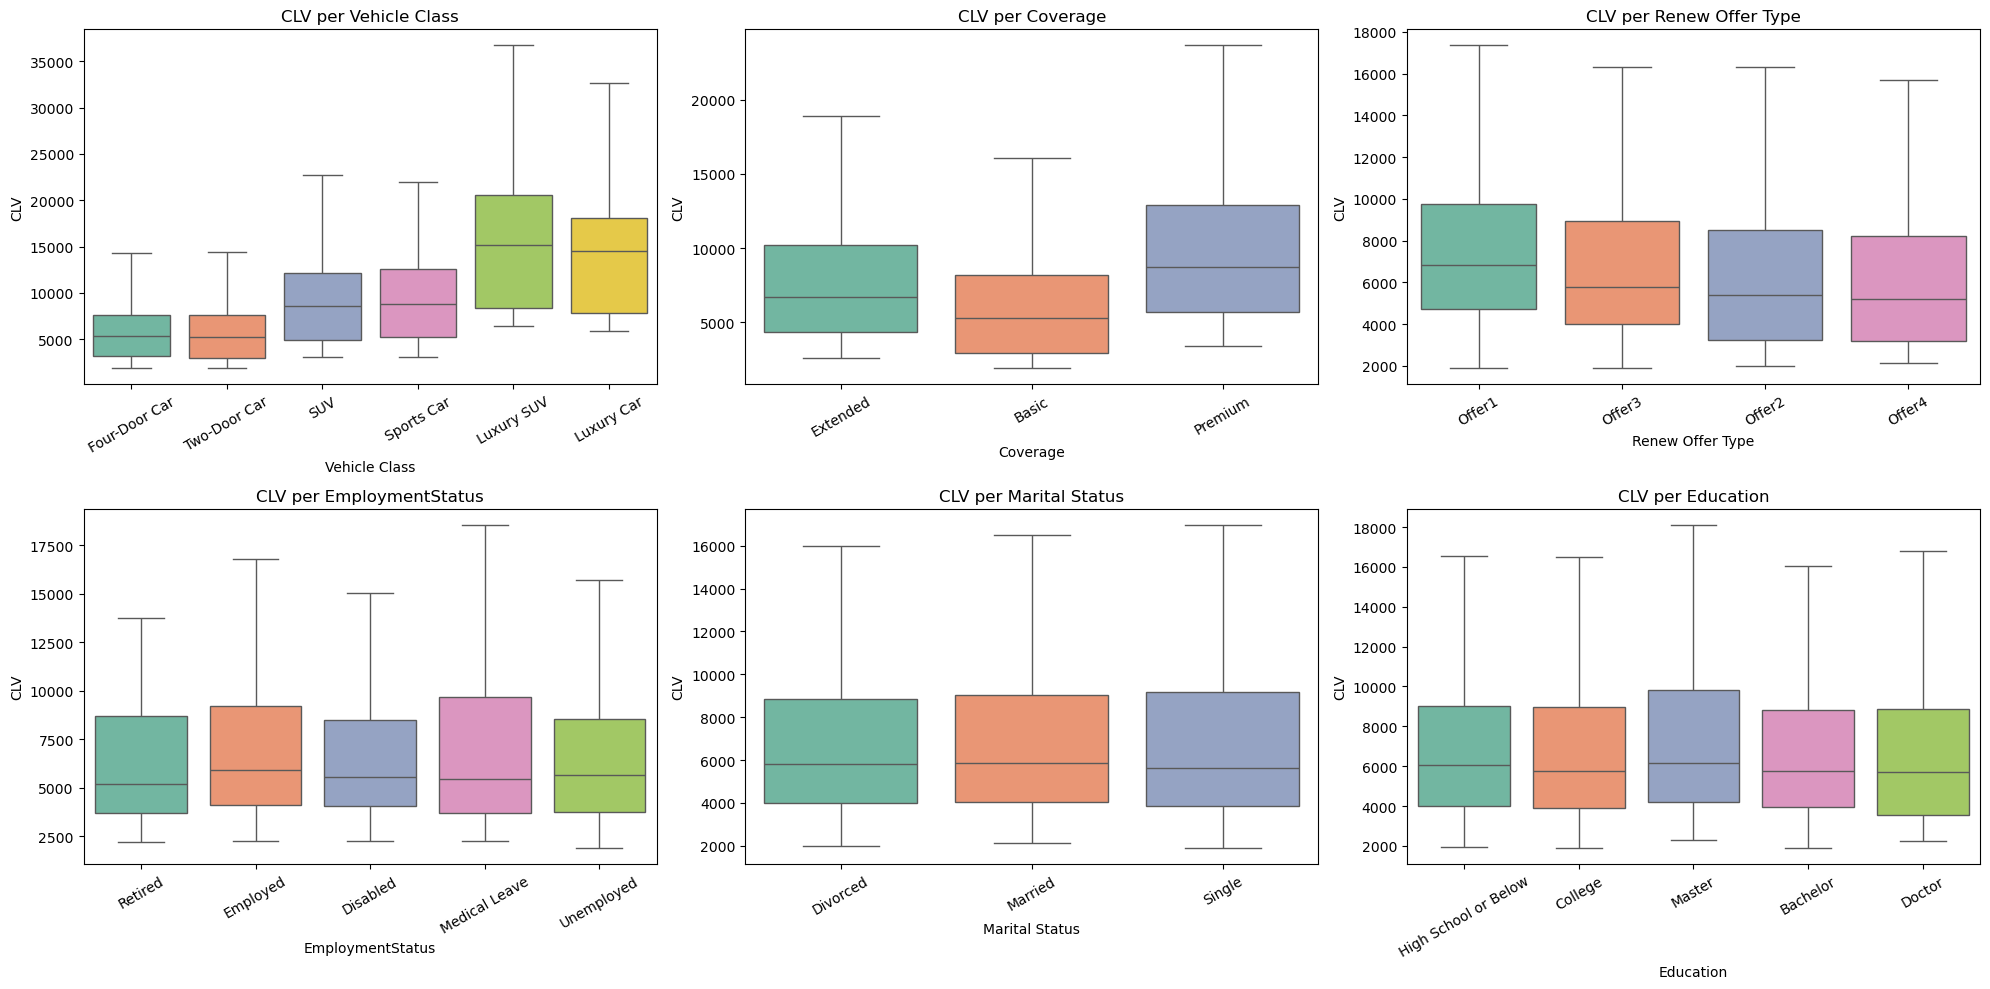

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for ax, col in zip(axes.flatten(), cat_features):
    # Boxplot CLV per kategori
    sns.boxplot(data=df_eda, x=col, y='Customer Lifetime Value', ax=ax, palette='Set2', showfliers=False)
    ax.set_title(f'CLV per {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('CLV')
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

Insight dari boxplot hubungan CLV dengan fitur kategorikal

1. Terdapat perbedaan median dan sebaran CLV yang cukup jelas antar kategori pada hampir semua fitur kategorikal.
2. Kategori Premium pada Coverage, Luxury SUV dan Sports Car pada Vehicle Class, serta tingkat pendidikan Master/Doctor cenderung memiliki median CLV lebih tinggi.
3. EmploymentStatus: Pelanggan Employed dan Retired umumnya memiliki CLV lebih tinggi dibanding Unemployed atau Medical Leave.
4. Marital Status: Perbedaan CLV antar status pernikahan tidak terlalu signifikan, namun Married sedikit lebih tinggi.
5. Renew Offer Type: Tidak ada perbedaan mencolok antar tipe penawaran, namun Offer1 dan Offer2 sedikit lebih tinggi.
6. Variasi CLV dalam satu kategori cukup besar (boxplot lebar), menandakan faktor lain juga berpengaruh.
7. Outlier CLV tinggi ditemukan di hampir semua kategori, terutama pada kategori dengan jumlah pelanggan lebih banyak.

Sekarang, kita akan menggunakan uji statistik untuk mengidentifikasi fitur kategorikal yang berpotensi penting dalam memprediksi CLV. Akan digunakan karena cocok untuk data CLV yang cenderung skewed dan mengandung outlier. Fitur kategorikal yang memiliki nilai p-value kecil pada uji Kruskal-Wallis dapat dianggap berpengaruh signifikan terhadap target dan layak dipertimbangkan sebagai fitur penting dalam pemodelan.

In [51]:
kruskal_results = {}
for col in cat_features:
    groups = [df_eda[df_eda[col] == cat]['Customer Lifetime Value'] for cat in df_eda[col].unique()]
    stat, p = kruskal(*groups)
    kruskal_results[col] = {'stat': stat, 'p_value': p}

kruskal_df = pd.DataFrame(kruskal_results).T
kruskal_df.columns = ['Kruskal_stat', 'Kruskal_p_value']

display(kruskal_df)

for col, res in kruskal_results.items():
    if res['p_value'] < 0.05:
        print(f"{col}: p-value = {res['p_value']:.2e} -> SIGNIFIKAN. Ada perbedaan CLV antar kategori.")
    else:
        print(f"{col}: p-value = {res['p_value']:.2e} -> Tidak signifikan.")

,Kruskal_stat,Kruskal_p_value
Vehicle Class,782.562759,6.845692e-167
Coverage,311.085269,2.809908e-68
Renew Offer Type,106.529756,6.124262e-23
EmploymentStatus,21.252980,2.821127e-04
Marital Status,4.672638,9.668290e-02
Education,8.011640,9.115273e-02


Vehicle Class: p-value = 6.85e-167 -> SIGNIFIKAN. Ada perbedaan CLV antar kategori.
Coverage: p-value = 2.81e-68 -> SIGNIFIKAN. Ada perbedaan CLV antar kategori.
Renew Offer Type: p-value = 6.12e-23 -> SIGNIFIKAN. Ada perbedaan CLV antar kategori.
EmploymentStatus: p-value = 2.82e-04 -> SIGNIFIKAN. Ada perbedaan CLV antar kategori.
Marital Status: p-value = 9.67e-02 -> Tidak signifikan.
Education: p-value = 9.12e-02 -> Tidak signifikan.


- Hasil uji Kruskal-Wallis memperkuat temuan visualisasi: fitur <span style="color: #008080;">**Vehicle Class**, **Coverage**, **Renew Offer Type**, dan **EmploymentStatus**</span> memiliki p-value < 0.05, artinya terdapat perbedaan CLV yang signifikan antar kategori pada fitur-fitur tersebut.
- Fitur <span style="color: #008080;">**Marital Status** dan **Education**</span> tidak menunjukkan perbedaan CLV yang signifikan secara statistik (p-value > 0.05), meskipun secara visual terdapat sedikit variasi.

#  <span style="color: #008080;">**III. Data Preprocessing**</span>

## **3.1 Data Cleaning**

### **Missing Value**

In [273]:
pd.DataFrame({
    'column': df.columns.values,
    'NaN_value(%)': df.isna().mean().values * 100,
    '0_value(%)': [(df[col] == 0).mean() * 100 if df[col].dtype != 'O' else 0 for col in df.columns],
    'duplicate' : df.duplicated().sum(),
    'unique': [df[col].unique() for col in df.columns]}
).round(2)

,column,NaN_value(%),0_value(%),duplicate,unique
0,Vehicle Class,0.0,0.00,618,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury SUV, Luxury Car]"
1,Coverage,0.0,0.00,618,"[Extended, Basic, Premium]"
2,Renew Offer Type,0.0,0.00,618,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,0.0,0.00,618,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,0.0,0.00,618,"[Divorced, Married, Single]"
5,Education,0.0,0.00,618,"[High School or Below, College, Master, Bachelor, Doctor]"
6,Number of Policies,0.0,0.00,618,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,0.0,0.00,618,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, 117.0, 78.0, 63.0, 70.0, 71.0, 61.0, 64.0, 129.0, 100.0, 68.0, 126.0, 95.0, 128.0, 84.0, 125.0, 98.0, 97.0, 121.0, 192.0, 69.0, 83.0, 72.0, 67.0, 103.0, 74.0, 89.0, 86.0, 110.0, 124.0, 73.0, 191.0, 122.0, 133.0, 165.0, 127.0, 144.0, 114.0, 194.0, 118.0, 111.0, 138.0, 119.0, 76.0, 80.0, 154.0, 189.0, 130.0, 109.0, 161.0, 88.0, 93.0, 113.0, 87.0, 136.0, 106.0, 99.0, 105.0, 82.0, 96.0, 159.0, 181.0, 146.0, 115.0, 187.0, 108.0, 209.0, 102.0, 104.0, 77.0, 79.0, 283.0, 150.0, 92.0, 91.0, 180.0, 131.0, 112.0, 184.0, 137.0, 185.0, 94.0, 198.0, 135.0, 140.0, 132.0, 139.0, 85.0, 123.0, 214.0, 201.0, 155.0, 193.0, 81.0, ...]"
8,Total Claim Amount,0.0,0.00,618,"[571.479602, 114.51444, 257.248789, 556.8, 355.820799, 85.063708, 584.567645, 144.987956, 264.563772, 582.781896, 39.781368, 227.44626, 347.857619, 239.328571, 340.8, 439.2, 307.2, 1178.950186, 480.0, 350.65008, 51.961915, 907.2, 423.787608, 234.683628, 456.0, 614.4, 475.2, 286.781601, 788.206874, 600.0, 265.877583, 513.6, 196.37368, 312.0, 335.840529, 580.8, 1921.248929, 331.2, 389.636991, 229.620398, 159.266473, 291.91645, 321.6, 685.227276, 355.2, 616.005527, 395.729716, 302.4, 287.5426, 528.0, 282.500791, 135.892444, 316.8, 525.6, 604.8, 981.010879, 650.52179, 668.29397, 349.954886, 345.6, 638.4, 1452.213743, 609.6, 93.128128, 297.6, 292.8, 268.471802, 624.023564, 245.447622, 476.903351, 624.711448, 820.431905, 547.2, 469.257835, 1067.291208, 416.2618, 566.4, 40.622304, 497.126827, 314.880326, 938.513425, 307.639408, 482.4, 29.984815, 290.70096, 30.874869, 199.79727, 384.0, 41.464402, 739.2, 571.2, 460.741097, 532.8, 206.810286, 199.851173, 799.2, 142.205246, 114.815893, 44.284642, 336.0, ...]"
9,Income,0.0,25.21,618,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, 94389.0, 25419.0, 26477.0, 36615.0, 59624.0, 37813.0, 35624.0, 24910.0, 62739.0, 18608.0, 46210.0, 0.0, 15192.0, 50397.0, 82210.0, 22538.0, 31614.0, 78358.0, 36510.0, 51962.0, 45345.0, 62039.0, 66550.0, 71134.0, 26721.0, 66726.0, 40672.0, 44685.0, 78804.0, 23616.0, 38667.0, 59961.0, 57117.0, 25221.0, 33806.0, 46051.0, 42526.0, 43963.0, 52819.0, 50450.0, 51972.0, 72421.0, 38183.0, 20325.0, 51032.0, 20567.0, 23671.0, 45302.0, 21102.0, 53565.0, 59797.0, 47509.0, 22239.0, 14665.0, 64801.0, 44986.0, 43817.0, 36845.0, 49259.0, 26486.0, 56446.0, 67787.0, 89464.0, 22475.0, 31972.0, 58089.0, 41990.0, 84903.0, 67137.0, 21450.0, 99874.0, 26100.0, 31275.0, 71186.0, 91580.0, 69417.0, 88592.0, 26806.0, 23656.0, 94527.0, 44096.0, 66839.0, 18643.0, 58682.0, 87002.0, 47725.0, 22244.0, 26245.0, 61085.0, 62464.0, 48367.0, 59207.0, 75007.0, 72874.0, 72540.0, ...]"


Dari nilai unique tiap kolom, terlihat kolom kategorik sudah aman **(tidak mengandung nilai yang menunjukkan missing value, misal: ?, unknown, dll)**. 
Terlihat ada nilai 0 di kolom Income yang mencapau 25,2%, jumlah ini sangat signifikan dan kemungkinan besar merepresentasikan missing value yang tersembunyi (misalnya karena pelanggan tidak melaporkan pendapatan). 

Akan dicek apakah **berhubungan dengan EmploymentStatus = Unemployed.**

In [274]:
df[df["Income"]==0]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
16,Four-Door Car,Basic,Offer2,Unemployed,Married,Bachelor,7.0,64.0,307.200000,0.0,4774.751709
17,SUV,Extended,Offer1,Unemployed,Single,College,1.0,129.0,1178.950186,0.0,4711.845199
21,SUV,Extended,Offer4,Unemployed,Single,Bachelor,1.0,126.0,907.200000,0.0,4531.675269
24,Two-Door Car,Extended,Offer1,Unemployed,Divorced,Bachelor,5.0,95.0,456.000000,0.0,6846.150323
26,Four-Door Car,Basic,Offer4,Unemployed,Single,Bachelor,1.0,66.0,475.200000,0.0,2239.647297
...,...,...,...,...,...,...,...,...,...,...,...
5651,SUV,Extended,Offer1,Unemployed,Single,High School or Below,1.0,129.0,1486.410662,0.0,4502.867562
5652,Four-Door Car,Extended,Offer4,Unemployed,Married,Bachelor,5.0,95.0,456.000000,0.0,6661.744145
5655,Two-Door Car,Basic,Offer1,Unemployed,Married,Bachelor,9.0,67.0,132.443705,0.0,4927.707574
5660,Two-Door Car,Basic,Offer2,Unemployed,Single,College,7.0,72.0,391.636628,0.0,4936.888359


Dari yang terlihat, Income = 0 ini ada pada EmploymentStatus = Unemployed.

Jenis-jenis missing value:
*  Missing Completely At Random (MCAR): tidak tergantung pada nilai kolom lain maupun nilai kolom itu sendiri. Misal karena error sistem. Dapat diisi mengguakan median/mean/iterative imputer.
* Missing At Random (MAR): tergantung pada kolom lain, tapi tidak tergantung pada nilainya sendiri. Misal: Income hilang lebih banyak pada pelanggan dengan EmploymentStatus = Unemployed. Dapat diisi menggunakan iterative imputer atau regresi yang mempertimbangkan variabel lain.
* Missing Not At Random (MNAR): tergantung pada nilai itu sendiri yang hilang. Misal: Pelanggan dengan Income rendah sengaja tidak mengisi (karena malu/malas). Dapat diisi dengan multiple imputation atau treat as separate class.

**Perlu selidiki lebih lanjut apakah nilai 0 ini memang valid atau perlu diimputasi.**

,Proporsi Income=0,Proporsi Total
EmploymentStatus,,
Unemployed,1.0,0.252073
Disabled,0.0,0.044452
Employed,0.0,0.624625
Medical Leave,0.0,0.047098
Retired,0.0,0.031752


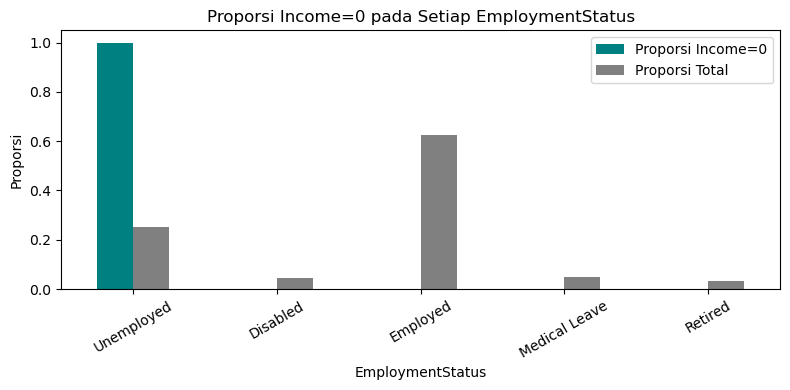

In [275]:
# Analisis apakah Income=0 (missing) berkorelasi dengan EmploymentStatus (indikasi MAR)
income_zero = df[df['Income'] == 0]
income_nonzero = df[df['Income'] != 0]
prop = income_zero['EmploymentStatus'].value_counts(normalize=True)
prop_all = df['EmploymentStatus'].value_counts(normalize=True)

income_missing_analysis = pd.DataFrame({
    'Proporsi Income=0': prop,
    'Proporsi Total': prop_all
}).fillna(0).sort_values('Proporsi Income=0', ascending=False)
display(income_missing_analysis)

# Visualisasi
income_missing_analysis.plot(kind='bar', figsize=(8,4), color=['teal', 'gray'])
plt.title('Proporsi Income=0 pada Setiap EmploymentStatus')
plt.ylabel('Proporsi')
plt.xlabel('EmploymentStatus')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

- Ternyata, seluruh nilai Income = 0 **hanya ditemukan pada** pelanggan dengan EmploymentStatus = **'Unemployed'**.
- Proporsi **Income = 0 pada Unemployed adalah 100%**, sedangkan pada status pekerjaan lain tidak ditemukan.
- Hal ini menunjukkan bahwa missing value pada Income bersifat MAR (Missing At Random), tergantung pada EmploymentStatus.

Maka, untuk penanganan di tahap preprocessing:
- Income = 0 pada Unemployed dapat **dianggap valid** (karena memang tidak memiliki pendapatan).
- Tidak perlu dilakukan imputasi untuk Income = 0 pada Unemployed.
- Untuk status pekerjaan lain, tidak ditemukan Income = 0 sehingga tidak perlu penanganan khusus.

Kesimpulan: <span style="color: #008080;"> **Tidak ada missing value Income yang perlu diimputasi**, cukup diperlakukan sesuai konteks EmploymentStatus.</span>

### **Duplicate**

In [276]:
df.duplicated().sum()

618

In [53]:
df.drop_duplicates(inplace=True)

Terdapat 618 baris duplikat, baris-baris duplikat ini harus dihapus karena:

- **Distribusi data menjadi bias:** Nilai-nilai tertentu akan muncul lebih sering dari seharusnya, sehingga statistik deskriptif (mean, median, dsb) dan visualisasi menjadi tidak akurat. (Tahap EDA dilakukan dengan sudah menghapus baris duplikat)
- **Model overfitting:** Model bisa "belajar" dari pola yang sebenarnya hanya pengulangan data, bukan pola nyata, sehingga performa model di data baru (unseen data) menurun.
- **Evaluasi model tidak valid:** Hasil evaluasi (misal pada cross-validation) bisa terlalu optimis karena data duplikat bisa muncul di train dan test set secara bersamaan, menyebabkan kebocoran informasi (data leakage).

<span style="color: #008080;"> **Dengan menghapus duplikat, kita memastikan proses analisis dan pemodelan lebih valid, generalisasi model lebih baik, dan hasil evaluasi lebih dapat dipercaya.**</span>

### **Outlier**

In [65]:
before_drop_outliers = df.copy()
before_drop_outliers.shape

(5015, 11)

Dari statistika deskriptif dan analisis distribusi di tahap EDA, terlihat adanya outlier di fitur numerik kecuali pada Income. Boxplot:

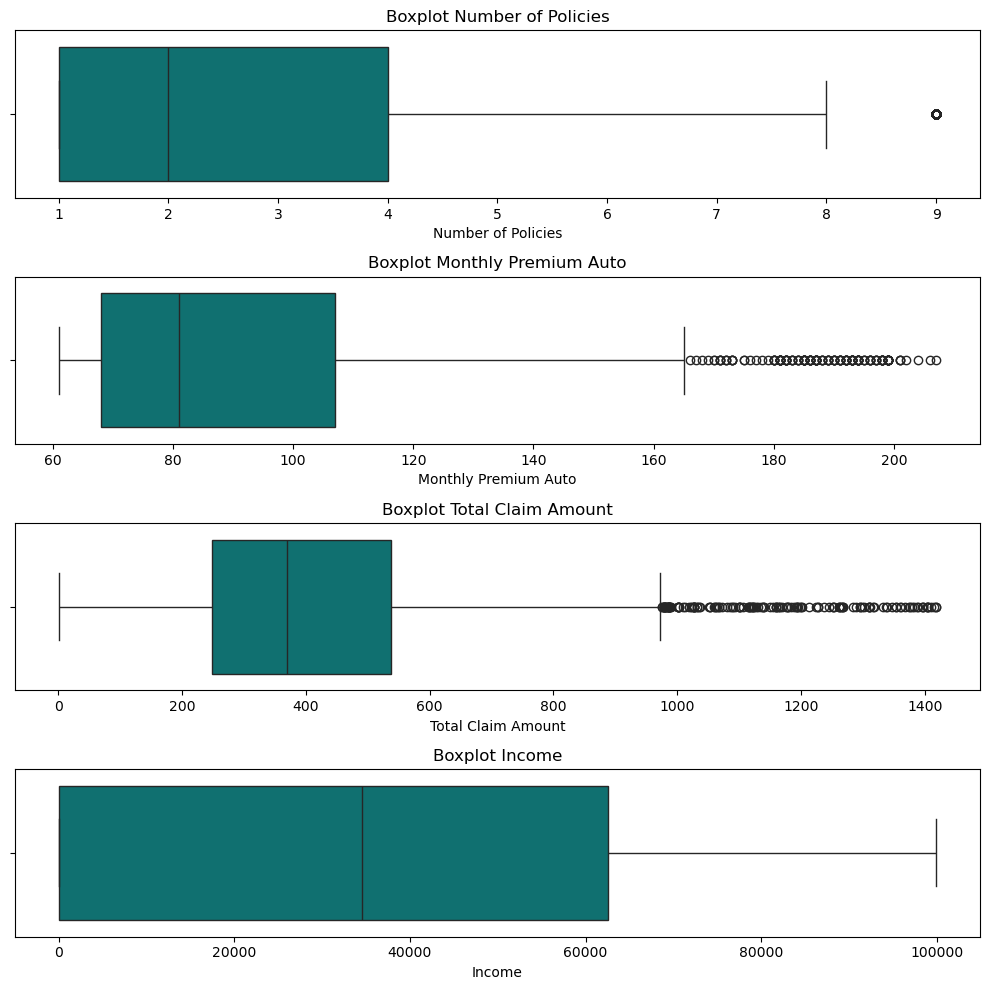

In [120]:
fig, axes = plt.subplots(len(num_features), 1, figsize=(10, 2.5 * len(num_features)))
for i, col in enumerate(num_features):
    sns.boxplot(x=df[col], ax=axes[i], color='teal')
    axes[i].set_title(f'Boxplot {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

Outlier dapat menyebabkan model regresi menjadi bias, menghasilkan koefisien yang tidak akurat, dan menurunkan kemampuan generalisasi model pada data baru. Namun, perlu hati-hati dalam menangani outlier agar tidak menghilangkan informasi penting.

Penghapusan outlier akan dilakukan pada fitur yang jumlah outliernya signifikan yaitu Total Claim Amount dan Monthly Premium Auto. Untuk Income dan Number of Policies yang outlier-nya tidak terlalu ekstrem atau secara bisnis memang wajar, akan gunakan RobustScaler.

In [54]:
def outlier_info(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    n_outlier = outliers.sum()
    percentage_outlier = n_outlier / len(series) * 100

    return {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'n_outlier': n_outlier,
        'percentage_outlier': percentage_outlier
    }

**Total Claim Amount**

In [55]:
outlier_info(df['Total Claim Amount'])

{'Q1': 251.776304,
 'Q3': 548.1231215,
 'IQR': 296.34681750000004,
 'lower_bound': -192.74392225000005,
 'upper_bound': 992.6433477500001,
 'n_outlier': 217,
 'percentage_outlier': 4.296178974460503}

Total Claim Amount memiliki 4,29% outlier terhadap total data. banyak outlier berada di atas upper bound $992. 

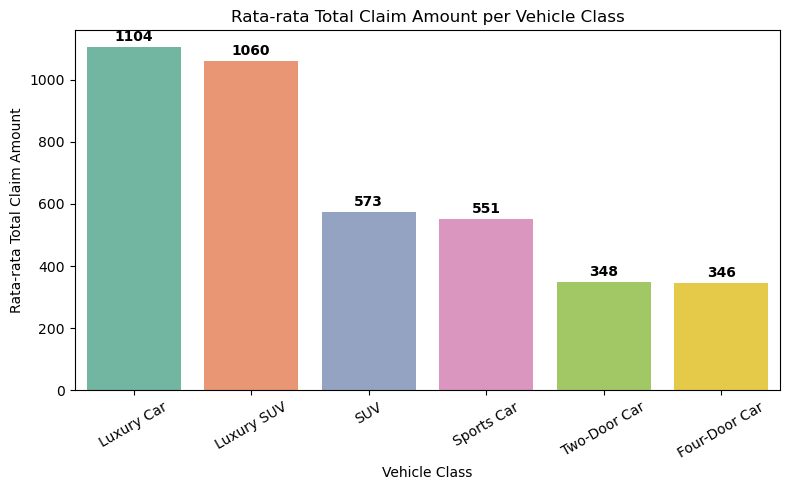

In [149]:
# Hitung rata-rata Total Claim Amount berdasarkan Vehicle Class
mean_tca_by_vehicle = df.groupby('Vehicle Class')['Total Claim Amount'].mean().sort_values(ascending=False)

# Visualisasi dengan barplot + angka rata-rata di atas bar
plt.figure(figsize=(8,5))
ax = sns.barplot(x=mean_tca_by_vehicle.index, y=mean_tca_by_vehicle.values, palette='Set2')
plt.title('Rata-rata Total Claim Amount per Vehicle Class')
plt.ylabel('Rata-rata Total Claim Amount')
plt.xlabel('Vehicle Class')
plt.xticks(rotation=30)

# Tambahkan angka rata-rata di atas bar
for i, v in enumerate(mean_tca_by_vehicle.values):
    ax.text(i, v + 10, f'{v:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [59]:
df.groupby("Vehicle Class")["Total Claim Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Vehicle Class,,,,,,,,
Four-Door Car,2565.0,346.106756,198.864261,0.423310,208.885686,336.000000,454.358500,1310.461580
Luxury Car,101.0,1103.927488,518.906203,32.874675,873.600000,1008.569798,1396.702365,2759.794354
Luxury SUV,101.0,1059.876385,518.991688,1.587888,825.657746,998.400000,1328.839129,2552.343856
SUV,963.0,573.174610,289.953148,0.517753,412.467956,556.800000,734.400000,1654.202174
Sports Car,262.0,550.563401,299.232668,5.573179,343.433805,556.800000,706.592595,1516.383753
Two-Door Car,1059.0,347.867548,193.766877,1.332349,230.655925,336.000000,456.488343,1261.943541


Menghapus outlier pada variabel Total Claim Amount dengan ambang atas $992.64 berisiko besar menghilangkan sebagian besar data dari kategori Luxury Car dan Luxury SUV, karena median keduanya berada di atas batas ini. Coba kita membuat batas atas baru dari data outlier.

In [60]:
outlier_tca = df[(df['Total Claim Amount'] < -192.74392225000005) | (df['Total Claim Amount'] > 992.6433477500001)]

# Menghitung IQR dari data outlier Total Claim Amount (menggunakan outlier_tca)
Q1_outlier_tca = outlier_tca['Total Claim Amount'].quantile(0.25)
Q3_outlier_tca = outlier_tca['Total Claim Amount'].quantile(0.75)
IQR_outlier_tca = Q3_outlier_tca - Q1_outlier_tca

Newupperbound_tca = Q3_outlier_tca + 1.5 * IQR_outlier_tca
print('new_upper_bound:', Newupperbound_tca)

new_upper_bound: 1861.6505425


Batas atas (upper bound) baru untuk Total Claim Amount ditetapkan adalah $1861.65. Data dengan Total Claim Amount di atas batas ini dianggap sebagai outlier dan dihapus dari dataset. Langkah ini bertujuan untuk menjaga agar informasi dari segmen pelanggan premium tetap terwakili, namun tetap mengurangi pengaruh nilai ekstrem yang dapat menyebabkan bias pada model prediksi.

In [61]:
outliers_TCA = df[df['Total Claim Amount'] > 1861.6505425]

# Drop baris dengan Total Claim Amount di atas 1861.6505425
df = df[df['Total Claim Amount'] <= 1861.6505425].reset_index(drop=True)

Maka, model yang dibuat nanti memiliki cakupan data Total Claim Amount maksimal hingga $1,418.40. Penggunaan model di luar rentang ini dapat menurunkan akurasi prediksi dan tidak direkomendasikan tanpa retraining model.

**Monthly Premium Auto**

In [56]:
outlier_info(df['Monthly Premium Auto'])

{'Q1': 68.0,
 'Q3': 109.0,
 'IQR': 41.0,
 'lower_bound': 6.5,
 'upper_bound': 170.5,
 'n_outlier': 252,
 'percentage_outlier': 4.989111067115423}

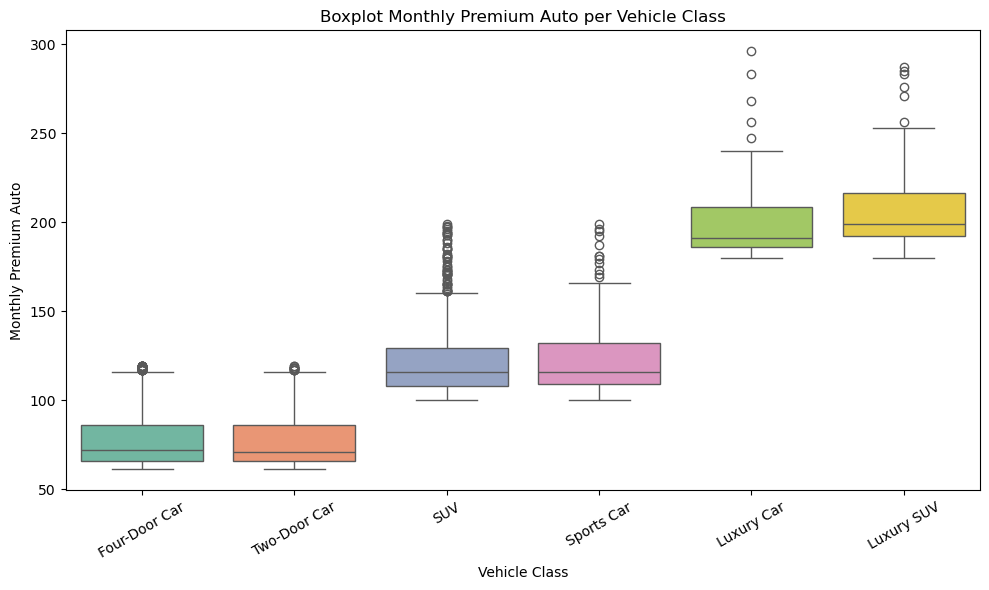

In [108]:
# Lihat distribusi Monthly Premium Auto per Vehicle Class (boxplot)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Vehicle Class', y='Monthly Premium Auto', palette='Set2', showfliers=True)
plt.title('Boxplot Monthly Premium Auto per Vehicle Class')
plt.ylabel('Monthly Premium Auto')
plt.xlabel('Vehicle Class')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Cek apakah upper bound IQR akan menghapus kategori tertentu

In [58]:
mpa_info = outlier_info(df['Monthly Premium Auto'])
mpa_upper = mpa_info['upper_bound']
mpa_outlier = df[df['Monthly Premium Auto'] > mpa_upper]
print("Jumlah data di atas upper bound:", len(mpa_outlier))
print("Distribusi Vehicle Class pada outlier:")
display(mpa_outlier['Vehicle Class'].value_counts())

Jumlah data di atas upper bound: 252
Distribusi Vehicle Class pada outlier:


Vehicle Class
Luxury SUV    101
Luxury Car    101
SUV            39
Sports Car     11
Name: count, dtype: int64

Jika menggunakan batas upper bound dari IQR untuk menghapus outlier, akan menghapus sekitar 4.3% data (217 baris) dan data dari kategori Luxury SUV dan Luxury Car yang terhapus. Akan dibuat upper bound baru menggunakan data outlier.

In [62]:
outlier_mpa = df[(df['Monthly Premium Auto'] < 6.5) | (df['Monthly Premium Auto'] > 170.5)]

# Menghitung IQR dari data outlier Total Claim Amount (menggunakan outlier_tca)
Q1_outlier_mpa = outlier_mpa['Monthly Premium Auto'].quantile(0.25)
Q3_outlier_mpa = outlier_mpa['Monthly Premium Auto'].quantile(0.75)
IQR_outlier_mpa = Q3_outlier_mpa - Q1_outlier_mpa

Newupperbound_mpa = Q3_outlier_mpa + 1.5 * IQR_outlier_mpa
print('new_upper_bound:', Newupperbound_mpa)

new_upper_bound: 243.0


Drop baris dengan Monthly Premium Auto di atas 243

In [63]:
df = df[df['Monthly Premium Auto'] <= Newupperbound_mpa].reset_index(drop=True)

**Customer Lifetime value**

Apakah outlier pada kolom target (Customer Lifetime Value) perlu dihapus? AKan dicek distribusi dan proporsi outlier pada CLV

In [158]:
clv_q1 = df['Customer Lifetime Value'].quantile(0.25)
clv_q3 = df['Customer Lifetime Value'].quantile(0.75)
clv_iqr = clv_q3 - clv_q1
clv_upper = clv_q3 + 1.5 * clv_iqr
clv_outlier_idx = df['Customer Lifetime Value'] > clv_upper
n_clv_outlier = clv_outlier_idx.sum()
prop_clv_outlier = n_clv_outlier / len(df) * 100

print(f"Jumlah outlier CLV di atas upper bound: {n_clv_outlier} ({prop_clv_outlier:.2f}%)")

Jumlah outlier CLV di atas upper bound: 445 (8.84%)


Outlier pada target CLV sering kali mencerminkan pelanggan bernilai sangat tinggi (VIP/high value). Jika outlier target dihapus, model tidak akan belajar memprediksi pelanggan bernilai sangat tinggi. Maka, outlier saat ini sebesar 8,84 % pada CLV tidak dihapus.

### **Multinollinearity**

In [80]:
import statsmodels.api as sm 
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor 

x = df[['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']]

# check multicolinearity
vif = pd.DataFrame()
vif['VIF factor'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif.round(2)

,VIF factor,Features
0,2.28,Number of Policies
1,12.93,Monthly Premium Auto
2,6.51,Total Claim Amount
3,2.73,Income
4,2.83,Customer Lifetime Value


Berdasarkan nilai VIF (Variance Inflation Factor):
- Monthly Premium Auto memiliki VIF tertinggi (~12.93), menunjukkan adanya multikolinearitas sedang-tinggi dengan fitur numerik lain.
- Total Claim Amount juga memiliki VIF cukup tinggi (~6.5), namun masih di bawah ambang batas umum (10).
- Fitur lain (Number of Policies, Income, Customer Lifetime Value) memiliki VIF < 3, menandakan multikolinearitas rendah.

Multikolinearitas pada Monthly Premium Auto dan Total Claim Amount kemungkinan disebabkan oleh hubungan bisnis yang erat antara premi bulanan dan jumlah klaim. Terdapat model yang relatif robust terhadap multikolinearitas seperti Gradien Boosting dan Random Forest.

Untuk saat ini, seluruh fitur numerik tetap dipertahankan agar model dapat memanfaatkan seluruh informasi yang tersedia. Jika pada tahap evaluasi model ditemukan masalah (misal: performa buruk atau interpretasi sulit), maka dapat dipertimbangkan untuk melakukan feature selection atau dimensionality reduction.

**Clean Dataset**

In [66]:
n_raw = 5669
n_before = before_drop_outliers.shape[0]
n_after = df.shape[0]
percent_remaining = n_after / n_raw * 100
percent_dropped = 100 - percent_remaining

print(f"Jumlah baris awal (sebelum hapus duplikat): {n_raw}")
print(f"Jumlah baris sebelum drop outlier: {n_before}")
print(f"Jumlah baris setelah drop outlier: {n_after}")
print(f"Persentase data yang tersisa: {percent_remaining:.2f}%")
print(f"Persentase data yang dihapus: {percent_dropped:.2f}%")

Jumlah baris awal (sebelum hapus duplikat): 5669
Jumlah baris sebelum drop outlier: 5015
Jumlah baris setelah drop outlier: 5015
Persentase data yang tersisa: 88.46%
Persentase data yang dihapus: 11.54%


In [67]:
df.to_csv('data_customer_lifetime_value_clean.csv', index=False)

In [11]:
df = pd.read_csv('data_customer_lifetime_value_clean.csv')
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5029,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,2.0,69.0,446.084760,30595.0,8114.409136
5030,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1.0,74.0,532.800000,0.0,2442.216651
5031,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2.0,109.0,523.200000,27778.0,12904.943360
5032,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1.0,62.0,44.780402,84658.0,2447.053134


## **3.2 Data Transformation**

### **Encoding**

In [12]:
import category_encoders as ce

In [13]:
df_object = df.select_dtypes(include='object')
pd.set_option('display.max_colwidth', None)
pd.DataFrame({
    'column': df_object.columns.values,
    'data type': df_object.dtypes.values,
    'n_unique': df_object.nunique().values,
    'unique': [df_object[col].unique() for col in df_object.columns]
})

,column,data type,n_unique,unique
0,Vehicle Class,object,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury Car, Luxury SUV]"
1,Coverage,object,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,object,5,"[Retired, Employed, Disabled, Medical Leave, Unemployed]"
4,Marital Status,object,3,"[Divorced, Married, Single]"
5,Education,object,5,"[High School or Below, College, Master, Bachelor, Doctor]"


Encoding diperlukan untuk mengubah data kategorikal menjadi format numerik agar dapat diproses oleh algoritma machine learning yang akan digunakan Pada dataset ini akan digunakan encoding:
1. OneHotEncoder untuk:
- Vehicle Class : Nominal, tidak ada urutan antar kategori, jumlah kategori sedikit (6).
- EmploymentStatus :Nominal, tidak ada urutan jelas antar status pekerjaan, jumlah kategori sedikit (5).
- Marital Status : Nominal, kategori (Single, Married, Divorced) tidak berurutan, jumlah kategori sedikit.
- Renew Offer Type : Nominal, tidak ada alasan bisnis/statistik yang menyatakan Offer1 < Offer2 < Offer3 < Offer4 (tidak memiliki urutan), jumlah kategori sedikit. 
2. OrdinalEncoder untuk:
- Coverage : Terdapat urutan tingkat perlindungan (Basic < Extended < Premium), sehingga encoding ordinal dapat menangkap hubungan tingkat.
- Education : Memiliki urutan jenjang pendidikan (High School < Bachelor < Master < Doctor), sehingga ordinal encoding dapat menangkap hubungan tingkat pendidikan.


In [14]:
coverage_map = [{'col' : 'Coverage',
                     'mapping' : {None : 0, 
                                  'Basic' : 1,
                                  'Extended' : 2, 
                                  'Premium' : 3}}]

education_map = [{'col' : 'Education',
                      'mapping' : {None : 0, 
                                   'High School or Below' : 1,
                                   'College' : 2, 
                                   'Bachelor' : 3, 
                                   'Master' : 4, 
                                   'Doctor' : 5}}]

### **Scaling**

Scaling (standarisasi atau normalisasi) sering digunakan dalam preprocessing data numerik untuk membuat fitur berada pada skala yang sebanding. Hal ini dapat membantu algoritma machine learning tertentu (misal: KNN, regresi berbasis regularisasi, tree ensemble dengan boosting) agar proses pelatihan lebih stabil dan konvergen lebih cepat. Namun, tidak semua model membutuhkan scaling, dan pada beberapa kasus, scaling tidak selalu meningkatkan performa.

Untuk tahap cross validation nanti, belum akan dilakukan scaling. Selanjutnya, pada proses hyperparameter tuning, akan dibandingkan performa model dengan beberapa metode scaling (RobustScaler, StandardScaler, MinMaxScaler) maupun tanpa scaling, untuk menentukan pendekatan terbaik sesuai karakteristik data dan model yang digunakan.

**Columns Transformer**

ColumnTransformer digunakan untuk menggabungkan proses encoding fitur kategorikal dan scaling fitur numerikal dalam satu pipeline. Dengan demikian, seluruh proses transformasi data menjadi lebih efisien dan konsisten sebelum masuk ke tahap pemodelan.

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['Vehicle Class', 'EmploymentStatus', 'Marital Status', 'Renew Offer Type']), 
        ('coverage_ordinal', ce.OrdinalEncoder(mapping=coverage_map), ['Coverage']),                                     
        ('education_ordinal', ce.OrdinalEncoder(mapping=education_map), ['Education']),

    ], 
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Marital Status', 'Renew Offer Type']),
                                ('coverage_ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': None        0
Basic       1
Extended    2
Premium     3
dtype: int64}]),
                                 ['Coverage']),
                                ('education_ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': None                    0
High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
dtype: int64}]),
                                 ['Education'])])

# <span style="color: #008080;">**IV. Modeling and Evaluation**</span>

## **4.1 Define X and y**

Berdasarkan business problem dan analisis data understanding, semua kolom akan digunakan sebagai fitur kecuali Customer Lifetime Value dan target adalah Customer Lifetime Value.

In [16]:
X = df.drop(columns='Customer Lifetime Value', axis = 1)  
y = df['Customer Lifetime Value']                         

In [17]:
pd.DataFrame(preprocessor.fit_transform(X)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,90.0,571.479602,11828.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,62.0,114.514440,44762.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,62.0,257.248789,21514.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,116.0,556.800000,17913.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,62.0,355.820799,19030.0


## **4.2 Data Splitting**

Sebelum melakukan pemodelan, dataset perlu dibagi menjadi data latih (*train set*) dan data uji (*test set*). Data latih digunakan untuk melatih model machine learning, sedangkan data uji digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya. Pembagian ini penting untuk memastikan hasil evaluasi model bersifat objektif dan dapat mengukur kemampuan generalisasi model terhadap data baru. Proporsi pembagian yang digunakan adalah 80% untuk data latih dan 20% untuk data uji.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state= 0
    )   

## **4.3 Modeling and Cross Validation**

Pada tahap ini, kita akan membangun model prediksi menggunakan data yang telah melalui proses pembersihan dan transformasi. Pemilihan model yang tepat sangat penting untuk mendapatkan hasil prediksi yang akurat dan dapat diandalkan. Sebelum melakukan tuning hyperparameter, 10 algoritma regresi dijadikan kandidat model pada regresi CLV antara lain:

1. LinearRegression: Model regresi linear sederhana yang mencari hubungan linear antara fitur dan target. Mudah diinterpretasi, cocok sebagai baseline.
2. Lasso (Lasso Regression) : Regresi linear dengan regularisasi L1. Dapat melakukan seleksi fitur otomatis dengan mengurangi koefisien fitur yang kurang penting menjadi nol.
3. Ridge (Ridge Regression) : Regresi linear dengan regularisasi L2. Mengurangi risiko overfitting dengan menekan besar koefisien, namun tidak menghilangkan fitur.
4. KNeighborsRegressor : Model non-parametrik yang memprediksi nilai target berdasarkan rata-rata nilai k tetangga terdekat di ruang fitur.5. DecisionTreeRegressor : Model berbasis pohon keputusan yang membagi data ke dalam kelompok berdasarkan fitur, mampu menangkap hubungan non-linear.
6. RandomForestRegressor : Ensemble dari banyak decision tree (bagging), meningkatkan akurasi dan stabilitas prediksi, serta mengurangi overfitting.
7. AdaBoostRegressor : Model boosting yang membangun beberapa model sederhana secara berurutan, tiap model fokus pada kesalahan model sebelumnya.
8. XGBRegressor : Implementasi boosting yang efisien dan populer (XGBoost), sangat baik untuk data tabular dan kompetisi machine learning.
9. GradientBoostingRegressor : Model boosting yang membangun pohon secara bertahap, tiap pohon baru memperbaiki kesalahan prediksi pohon sebelumnya.
10. StackingRegressor : Ensemble yang menggabungkan beberapa model dasar (dalam project ini: lr, dt, knn) dan menggunakan model meta (LinearRegression) untuk menggabungkan prediksi mereka, meningkatkan performa dengan memanfaatkan keunggulan masing-masing model.

Sebelum melakukan tuning hyperparameter, seluruh kandidat model akan dievaluasi menggunakan teknik cross validation (K-Fold) untuk membandingkan performa awal (baseline) masing-masing model. Model dengan performa terbaik dan stabil akan dipilih untuk tahap tuning.

In [29]:
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import mean_absolute_percentage_error

In [20]:
#Define Model
lr = LinearRegression()
lasso = Lasso(alpha = 0.001)
ridge = Ridge(alpha = 0.001)
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state= 0)
rf = RandomForestRegressor(random_state= 0) #bagging
adab = AdaBoostRegressor(random_state= 0)
xgb = XGBRegressor(random_state= 0) #boosting
gbr = GradientBoostingRegressor(random_state= 0) #boosting

# stacking
base_model = ([
    ('lr', lr),
    ('dt', dt),
    ('knn', knn) ])

meta_model = LinearRegression()
stacking = StackingRegressor(base_model,meta_model)


model = [lr, lasso, ridge, knn, dt, rf, adab, xgb, gbr, stacking]

# Evaluation Metrics
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

scoring = {'rmse': 'neg_root_mean_squared_error',
           'mae': 'neg_mean_absolute_error',
           'mape': 'neg_mean_absolute_percentage_error',
           'r2': 'r2'}

for i in model:
    pipe_model = Pipeline([
        ('preprocessor', preprocessor),
        ('model', i)
    ])

    # Cross validation untuk mencari model terbaik
    cv_score = cross_validate(
        estimator= pipe_model,
        X= X_train, 
        y= y_train,
        scoring= scoring,
        cv = 5
    )

    # RMSE Score
    score_rmse.append(cv_score['test_rmse'])
    nilai_mean_rmse.append(cv_score['test_rmse'].mean())
    nilai_std_rmse.append(cv_score['test_rmse'].std())

    # MAE Score
    score_mae.append(cv_score['test_mae'])
    nilai_mean_mae.append(cv_score['test_mae'].mean())
    nilai_std_mae.append(cv_score['test_mae'].std())

    # MAPE Score
    score_mape.append(cv_score['test_mape'])
    nilai_mean_mape.append(cv_score['test_mape'].mean())
    nilai_std_mape.append(cv_score['test_mape'].std())

    # R-Square Score    
    score_r2.append(cv_score['test_r2'])
    nilai_mean_r2.append(cv_score['test_r2'].mean())
    nilai_std_r2.append(cv_score['test_r2'].std())

In [25]:
model_names = [
    'Linear Regression', 'Lasso', 'Ridge', 'KNN', 'Decision Tree',
    'Random Forest', 'AdaBoost', 'XGBoost', 'Gradient Boosting', 'Stacking'
]

score_before_tuning = pd.DataFrame({
    'Model': model_names,
    'mean_RMSE': nilai_mean_rmse,
    'std_RMSE': nilai_std_rmse,
    'mean_MAE': nilai_mean_mae,
    'std_MAE': nilai_std_mae,
    'mean_MAPE': nilai_mean_mape,
    'std_MAPE': nilai_std_mape,
    'Mean_R2': nilai_mean_r2,
    'Std_R2' : nilai_std_r2
})

def highlight_best(s, best='max', absolute=False):
    vals = s.abs() if absolute else s
    if best == 'max':
        is_best = vals == vals.max()
    else:
        is_best = vals == vals.min()
    return ['background-color: #ffe082; font-weight: bold' if v else '' for v in is_best]

score_before_tuning.style\
    .apply(highlight_best, subset=['Mean_R2'], best='max')\
    .apply(highlight_best, subset=['mean_RMSE', 'mean_MAE', 'mean_MAPE'], best='min', absolute=True)

,Model,mean_RMSE,std_RMSE,mean_MAE,std_MAE,mean_MAPE,std_MAPE,Mean_R2,Std_R2
0,Linear Regression,-6327.807743,236.859102,-3862.409221,121.561808,-0.586474,0.009484,0.181711,0.030271
1,Lasso,-6327.804856,236.857286,-3862.407875,121.561817,-0.586474,0.009484,0.181712,0.030271
2,Ridge,-6327.806339,236.857774,-3862.409173,121.561888,-0.586474,0.009484,0.181711,0.030271
3,KNN,-7241.192083,308.388629,-4625.113645,137.375243,-0.711798,0.011695,-0.070907,0.033016
4,Decision Tree,-5688.811299,169.092138,-2052.314847,65.775965,-0.148162,0.004039,0.334865,0.069483
5,Random Forest,-4220.237295,140.834689,-1728.771053,52.193349,-0.126322,0.005593,0.635309,0.025328
6,AdaBoost,-5728.698556,732.303122,-4419.662762,1101.328212,-0.625426,0.221351,0.306351,0.202078
7,XGBoost,-4375.980904,173.483181,-2165.864670,96.071343,-0.225361,0.011616,0.607785,0.030782
8,Gradient Boosting,-3953.637624,153.330113,-1783.660817,80.021185,-0.149578,0.008424,0.680649,0.010157
9,Stacking,-4949.786438,255.006948,-2372.480643,128.677383,-0.284233,0.011044,0.497330,0.054452


Dua kandidat terbaik berdasarkan evaluation metrics: Random Forest dan Gradien Boosting. Sekarang cek R2 train set-nya:

In [ ]:
# Pipeline untuk Random Forest
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf)
])
pipe_rf.fit(X_train, y_train)
r2_rf_train = pipe_rf.score(X_train, y_train)

# Pipeline untuk Gradient Boosting
pipe_gbr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gbr)
])
pipe_gbr.fit(X_train, y_train)
r2_gbr_train = pipe_gbr.score(X_train, y_train)

print(f"R2 Train Random Forest: {r2_rf_train:.4f}")
print(f"R2 Train Gradient Boosting: {r2_gbr_train:.4f}")

R2 Train Random Forest: 0.9484
R2 Train Gradient Boosting: 0.7591


Model **Gradient Boosting** memiliki skor R2 tertinggi dan error (RMSE, MAE, MAPE) rendah, menunjukkan performa prediksi terbaik di antara semua kandidat. Random Forest juga menunjukkan performa yang baik, namun Random Forest mengalami overfitting jika dilihat dari perbedaan R2 train dan test-nya. Model linear (Linear Regression, Lasso, Ridge) memiliki skor R2 jauh lebih rendah dan error lebih tinggi, kurang cocok untuk data ini.
Berdasarkan hasil ini, **Gradient Boosting** dipilih sebagai model terbaik untuk prediksi Customer Lifetime Value. Setelah ini akan dilakukan hyperparameter tuning untuk meningkatkan performa model terbaik.


predict to test menggunakan model terbaik:

In [27]:
best_model = GradientBoostingRegressor(random_state= 0)
pipe_best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model)
])

pipe_best_model.fit(X_train, y_train)
y_pred = pipe_best_model.predict(X_test)

In [30]:
# Hitung metrik evaluasi
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))
mae_gb = mean_absolute_error(y_test, y_pred)
mape_gb = mean_absolute_percentage_error(y_test, y_pred)
r2_gb = r2_score(y_test, y_pred)

print("Gradient Boosting (Sebelum tuning):")
print(f"RMSE : {rmse_gb:.2f}")
print(f"MAE  : {mae_gb:.2f}")
print(f"MAPE : {mape_gb:.4f}")
print(f"R2   : {r2_gb:.4f}")

Gradient Boosting (Sebelum tuning):
RMSE : 4004.66
MAE  : 1819.29
MAPE : 0.1499
R2   : 0.6572


Perbedaan angka RMSE, MAE, MAPE, R² antara tabel kandidat model vs pada evaluasi akhir disebabkan karena data yang dievaluasi berbeda  
- Tabel kandidat model menggunakan skor rata-rata cross-validation pada data latih (X_train, y_train).
- Evaluasi akhir menggunakan data uji (X_test, y_test) yang benar-benar belum pernah dilihat model.
  
Nilai R² pada tabel kandidat model adalah rata-rata cross-validation di data latih, sedangkan nilai R² pada evaluasi akhir adalah performa di data uji. Nilai di data uji biasanya sedikit lebih rendah dan itu normal.

## **4.4 Hyperparameter Tuning**

Hyperparameter tuning bertujuan untuk mengoptimalkan performa model dengan mencari kombinasi parameter terbaik. Proses ini dilakukan pada model  <span style="color: #008080;">**Gradient Boosting**</span>yang sebelumnya terbukti memberikan hasil prediksi paling baik dari seluruh kandidat model.

Gradient Boosting adalah teknik ensemble yang membangun model prediksi secara **bertahap/ sequential** dengan menggabungkan banyak model sederhana (decision tree) secara berurutan. Setiap model baru berusaha memperbaiki kesalahan (error) dari model-model sebelumnya. Prosesnya:

1. Model pertama dibuat untuk memprediksi target.
2. Model berikutnya dilatih untuk memprediksi sisa error (residual) dari model sebelumnya.
3. Proses ini diulang beberapa kali, sehingga setiap model baru "mengoreksi" kesalahan model sebelumnya.
4. Hasil akhir adalah penjumlahan prediksi semua model (dengan bobot tertentu).

Gradient Boosting menggunakan algoritma gradient descent untuk meminimalkan fungsi loss, sehingga model secara bertahap semakin baik dalam memprediksi target.

<span style="color: #008080;">**Parameter pada Hyperparameter Tuning Gradient Boosting:**</span>

- n_estimators: Jumlah pohon (tree) yang akan dibangun secara berurutan. Semakin banyak, model bisa lebih kompleks, tapi risiko overfitting meningkat.
- max_depth: Kedalaman maksimum tiap pohon. Mengontrol kompleksitas pohon; pohon yang lebih dalam bisa menangkap pola lebih rumit, tapi juga lebih mudah overfit.
- learning_rate: Bobot kontribusi setiap pohon baru terhadap prediksi akhir. Nilai kecil membuat proses belajar lebih lambat tapi bisa meningkatkan akurasi (dengan n_estimators lebih banyak).
- subsample: Proporsi data latih yang digunakan untuk membangun setiap pohon. Nilai <1 membuat model lebih robust terhadap overfitting (mirip bagging).
- min_samples_split: Jumlah minimum sampel yang dibutuhkan untuk membagi node internal. Nilai lebih besar membuat pohon lebih "pruning" (tidak terlalu dalam).
- min_samples_leaf: Jumlah minimum sampel pada daun (leaf) pohon. Membatasi pohon agar tidak terlalu detail pada data minoritas/outlier.

Dengan tuning parameter-parameter ini, kita mencari kombinasi yang menghasilkan model paling akurat dan generalisasi terbaik pada data baru.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Daftar scaler yang akan diuji
scalers = [
    ('no_scaling', 'passthrough'),
    ('standard', StandardScaler()),
    ('minmax', MinMaxScaler()),
    ('robust', RobustScaler())
]

# Parameter grid untuk Gradient Boosting
param_grid = {
    'model__n_estimators': list(np.arange(120, 200, 20)),
    'model__max_depth': list(np.arange(3, 7)),
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': list(np.arange(0.6, 0.8, 0.05)),
    'model__min_samples_split': [5, 10],
    'model__min_samples_leaf': [3, 5]
}

results1 = []

for scaler_name, scaler in scalers:
    # Buat preprocessor baru dengan scaler yang sesuai
    preprocessor_scaled = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(drop='first'), ['Vehicle Class', 'EmploymentStatus', 'Marital Status', 'Renew Offer Type']),
            ('coverage_ordinal', ce.OrdinalEncoder(mapping=coverage_map), ['Coverage']),
            ('education_ordinal', ce.OrdinalEncoder(mapping=education_map), ['Education']),
            ('scaler', scaler, ['Monthly Premium Auto', 'Total Claim Amount', 'Income'])
        ],
        remainder='passthrough'
    )

    pipe_gb = Pipeline([
        ('preprocessor', preprocessor_scaled),
        ('model', GradientBoostingRegressor(random_state=0))
    ])

    grid = GridSearchCV(
    estimator=pipe_gb,
    param_grid=param_grid,
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'],
    refit='neg_root_mean_squared_error',  # <-- Add this line
    cv=5,
    n_jobs=-1
    )

    # Ganti dengan randomsearch
    #random_search = RandomizedSearchCV(
    #    estimator=pipe_gb,
    #    param_distributions=param_grid,
    #    n_iter=200,
    #    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'],
    #    refit='neg_root_mean_squared_error',
    #    cv=5,
    #    n_jobs=-1, 
    #    random_state=0
    #)

    grid

In [34]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'EmploymentStatus',
                                                                          'Marital '
                                                                          'Status',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type']),
                                                                        ('coverage_ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'Coverage',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': None        0
Basic       1
Extended    2
Pre...
                         'model__max_depth': [3, 4, 5, 6],
                         'model__min_samples_leaf': [3, 5],
                         'model__min_samples_split': [5, 10],
                         'model__n_estimators': [120, 140, 160, 180],
                         'model__subsample': [0.6, 0.65, 0.7000000000000001,
                                              0.7500000000000001,
                                              0.8000000000000002]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error', 'r2'])

In [43]:
# Predict on test data
y_pred_tuned = grid.predict(X_test)
    
# Calculate metrics
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mape_tuned = mean_absolute_percentage_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

results_tuned = [] 

# Save results
results_tuned.append({
    'Scaler': scaler_name,
    'Best Params': grid.best_params_,
    'Test RMSE': rmse_tuned,
    'Test MAE': mae_tuned,
    'Test MAPE': mape_tuned,
    'Test R2': r2_tuned,
    'CV Best Score (Neg RMSE)': grid.best_score_,
    'Model': grid.best_estimator_
})

# Convert to DataFrame
results_tuned_df = pd.DataFrame(results_tuned)

# Sort by best performance (lowest RMSE)
results_tuned_df = results_tuned_df.sort_values('Test RMSE').reset_index(drop=True)

# Display important columns
final_results_df = pd.DataFrame(results_tuned_df[['Scaler', 'Test RMSE', 'Test MAE', 'Test MAPE', 'Test R2', 'Best Params']])
final_results_df


,Scaler,Test RMSE,Test MAE,Test MAPE,Test R2,Best Params
0,robust,3857.935439,1722.109269,0.137762,0.681906,"{'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 140, 'model__subsample': 0.7000000000000001}"


Setelah dilakukan tuning menggunakan GridSearch, diperoleh scaling **RobustScaler** dapat meningkatkan performa model dibandingkan tanpa scaling dan parameter Gradien Boosting sebegai berikut:

- **learning_rate=0.05**: Membuat setiap tree baru hanya memberi kontribusi kecil, sehingga model belajar secara bertahap dan lebih stabil.
- **max_depth=3**: Setiap decision tree hanya boleh memiliki kedalaman maksimal 3, sehingga model tidak terlalu kompleks dan mengurangi risiko overfitting.
- **min_samples_leaf=5**: Setiap daun pada tree minimal berisi 5 sampel, membuat tree lebih "halus" dan generalisasi lebih baik.
- **min_samples_split=5**: Node hanya akan di-split jika terdapat minimal 5 sampel, mencegah tree membelah node dengan data terlalu sedikit.
- **n_estimators=140**: Total ada 140 tree yang digabungkan dalam boosting.
- **subsample=0.7**: Setiap tree hanya dilatih pada 70% data yang diambil secara acak, sehingga model lebih robust terhadap overfitting.


In [ ]:
import pickle

pickle.dump(grid, open('model_gradient_boosting_tuned.pkl','wb'))
save_model = pickle.load(open('model_gradient_boosting_tuned.pkl','rb'))

perbandingan sebelum dan sesudah tuning

In [49]:
score_before_tuning = pd.DataFrame({
    'RMSE': [rmse_gb],
    'MAE': [mae_gb],
    'MAPE': [mape_gb],
    'R2': [r2_gb],
    'R2 (train)': [r2_gbr_train]
}, index=['Gradient Boost (before tuning)'])

y_train_pred_tuned = grid.predict(X_train)
r2_tuned_train = r2_score(y_train, y_train_pred_tuned)

score_after_tuning = pd.DataFrame({
    'RMSE': [rmse_tuned],
    'MAE': [mae_tuned],
    'MAPE': [mape_tuned],
    'R2': [r2_tuned],
    'R2 (train)': [r2_tuned_train]
}, index=['Gradient Boost (after tuning)'])

comparison = pd.concat([score_before_tuning, score_after_tuning])
display(comparison)

,RMSE,MAE,MAPE,R2,R2 (train)
Gradient Boost (before tuning),4004.663574,1819.293806,0.149896,0.657249,0.759128
Gradient Boost (after tuning),3857.935439,1722.109269,0.137762,0.681906,0.735537


- RMSE (Root Mean Squared Error): Sebelum tuning: 4004.66, setelah tuning: 3857.93
Terjadi penurunan RMSE setelah tuning, menandakan prediksi model terhadap nilai CLV menjadi lebih akurat secara rata-rata.
- MAE (Mean Absolute Error): Sebelum tuning: 1819.29, setelah tuning: 1722.1
MAE juga menurun, menunjukkan rata-rata selisih absolut antara prediksi dan nilai aktual semakin kecil.
- MAPE (Mean Absolute Percentage Error): Sebelum tuning: 0.1499 (14.99%), setelah tuning: 0.1377 (13.77%)
 MAPE turun sekitar 1%, artinya model semakin baik dalam memprediksi CLV secara relatif terhadap nilai aktual.
- R² (R-squared): Sebelum tuning: 0.6572, setelah tuning: 0.6819
Nilai R² meningkat, menunjukkan proporsi variasi CLV yang dapat dijelaskan model juga bertambah setelah tuning.
- Perbedaan R² (R-squared) antara train set dan test set setelah tuning juga berkurang (sebelum = 0.1, sesudah = 0,05), menandakan generalisasi model lebih baik dari sebelum tuning.

**Tuning hyperparameter dan penggunaan RobustScaler berhasil meningkatkan performa model pada seluruh metrik evaluasi.**

Nilai R² train set: 0.7385 dan R² test set: 0.6815 tidak menunjukkan underfitting karena model cukup bisa menangkap pola dalam data pelatihan dan masih bekerja cukup baik di data uji. Namun, nilai ini menyisakan ruang untuk improvement. Jika kita ingat kembali di EDA, korelasi CLV dengan fitur-fitur numerik juga cenderung rendah. Cek kembali nilai korelasi:

**Intrpretasi**

Selanjutnya akan dibuat grafik residual dan grafik y_actual vs y_pred CLV.

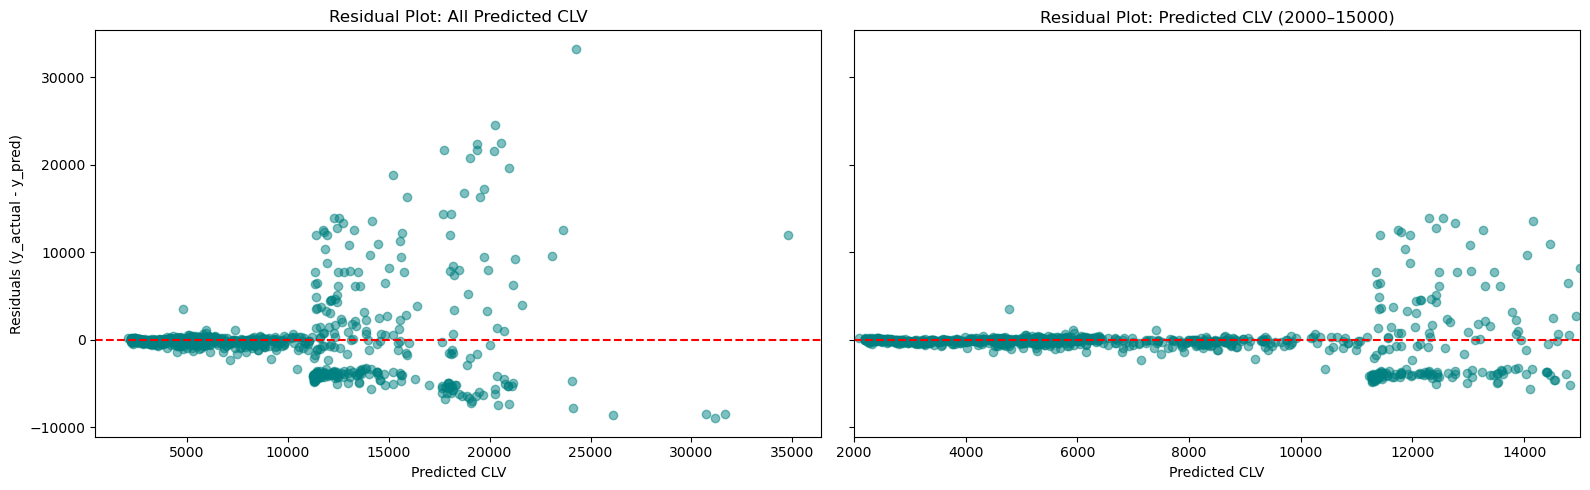

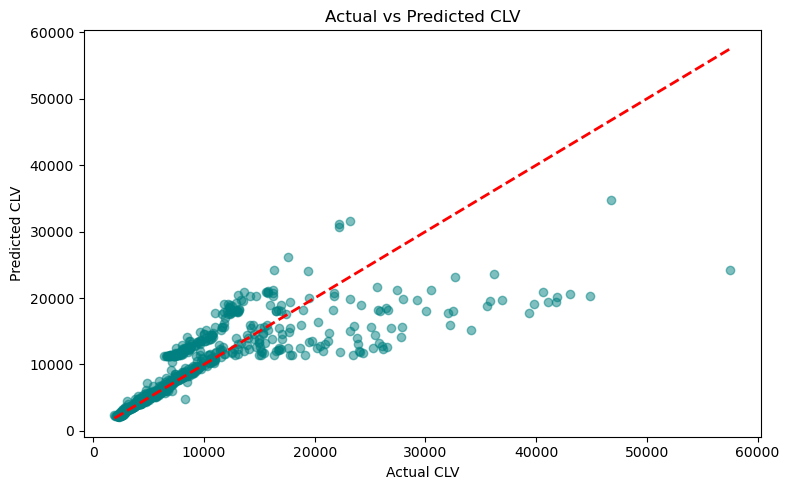

In [84]:
# Grafik Residuals vs y_pred
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Plot 1: Residual plot seluruh data
axes[0].scatter(y_pred_tuned, residuals, alpha=0.5, color='teal')
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residual Plot: All Predicted CLV')
axes[0].set_xlabel('Predicted CLV')
axes[0].set_ylabel('Residuals (y_actual - y_pred)')
# Plot 2: Residual plot untuk CLV 2000–15000
axes[1].scatter(y_pred_tuned, residuals, alpha=0.5, color='teal')
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_xlim((2000, 15000))
axes[1].set_title('Residual Plot: Predicted CLV (2000–15000)')
axes[1].set_xlabel('Predicted CLV')

plt.tight_layout()
plt.show()

# Grafik y_actual vs y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_tuned, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs Predicted CLV')
plt.tight_layout()
plt.show()

**Interpretasi Residual dan Prediksi CLV**

Residual plot menunjukkan bahwa residual tersebar cukup acak di sekitar nol pada nilai prediksi CLV rendah hingga menengah, menandakan model cukup akurat untuk segmen pelanggan dengan CLV kecil hingga sedang. Namun, seiring meningkatnya nilai CLV yang diprediksi, residual menjadi lebih besar dan menyebar, menunjukkan pola yang tidak konsisten. Hal ini mengindikasikan adanya *heteroskedastisitas*—yaitu variabilitas error yang meningkat pada nilai CLV tinggi—yang memperlihatkan bahwa model mengalami kesulitan dalam memprediksi pelanggan bernilai tinggi.

Dukungan terhadap kesimpulan tersebut juga tampak pada grafik *Actual vs Prediction*, di mana titik-titik banyak mengikuti garis diagonal (prediksi mendekati aktual) pada CLV rendah hingga menengah. Sebaliknya, pada nilai CLV yang besar (di atas 15.000), model cenderung *underpredict*, yaitu memprediksi lebih rendah dari nilai sebenarnya.

Dengan R² pada data test sebesar ±0.68, model dapat dikatakan cukup baik dalam memprediksi CLV secara umum. Namun, akurasi terhadap pelanggan dengan nilai CLV sangat tinggi (VIP customer) masih perlu ditingkatkan. Oleh karena itu, di project ini tidak langsung menghapus semua outlier, karena mereka merepresentasikan segmen pelanggan bernilai tinggi yang penting untuk dipertahankan dalam pelatihan model.


**Limitasi Model**

| Fitur                   | Tipe      | Nilai/Range yang Diperbolehkan                                                                 | Keterangan/Urutan                                                                 |
|------------------------ |-----------|-----------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|
| Vehicle Class           | Kategori  | Luxury Car, Luxury SUV, SUV, Sports Car, Two-Door Car, Four-Door Car                          | -                                                                                 |
| EmploymentStatus        | Kategori  | Employed, Unemployed, Medical Leave, Retired                                                  | -                                                                                 |
| Marital Status          | Kategori  | Single, Married, Divorced                                                                     | -                                                                                 |
| Renew Offer Type        | Kategori  | Offer1, Offer2, Offer3, Offer4                                                                | -                                                                                 |
| Coverage                | Ordinal   | Basic, Extended, Premium                                                                      | Basic < Extended < Premium                                                        |
| Education               | Ordinal   | High School or Below, College, Bachelor, Master, Doctor                                       | High School or Below < College < Bachelor < Master < Doctor                       |
| Monthly Premium Auto    | Numerik   | 62.0 – 298.0                                                                                  | -                                                                                 |
| Total Claim Amount      | Numerik   | 0.0 – 734.686885                                                                              | -                                                                                 |
| Income                  | Numerik   | 0.0 – 99,981.0                                                                                | -                                                                                 |

Catatan: 
- Input di luar nilai/isi di atas berpotensi menghasilkan prediksi yang tidak valid.  

## **4.5 Feature Importance**

In [95]:
tuned_estimator = grid.best_estimator_

# Mendapatkan nama kolom dari tahapan preprocessing sebelumnya
list_features = (list(tuned_estimator[0].transformers_[0][1].get_feature_names_out()) +
            tuned_estimator[0].transformers_[1][2] +
            tuned_estimator[0].transformers_[2][2] +
            tuned_estimator[0].transformers_[3][2] +
            list(X_train.columns[tuned_estimator[0].transformers_[4][2]]))

# Membuat Dataframe feature importance
feature_imp = pd.DataFrame({
    'feature' : list_features,
    'imp' : tuned_estimator['model'].feature_importances_
}).sort_values('imp', ascending=False)

feature_imp

,feature,imp
19,Number of Policies,0.633924
16,Monthly Premium Auto,0.325133
17,Total Claim Amount,0.012999
18,Income,0.012908
9,Marital Status_Married,0.006658
15,Education,0.004232
3,Vehicle Class_Sports Car,0.002093
11,Renew Offer Type_Offer2,0.000396
8,EmploymentStatus_Unemployed,0.000305
14,Coverage,0.000260


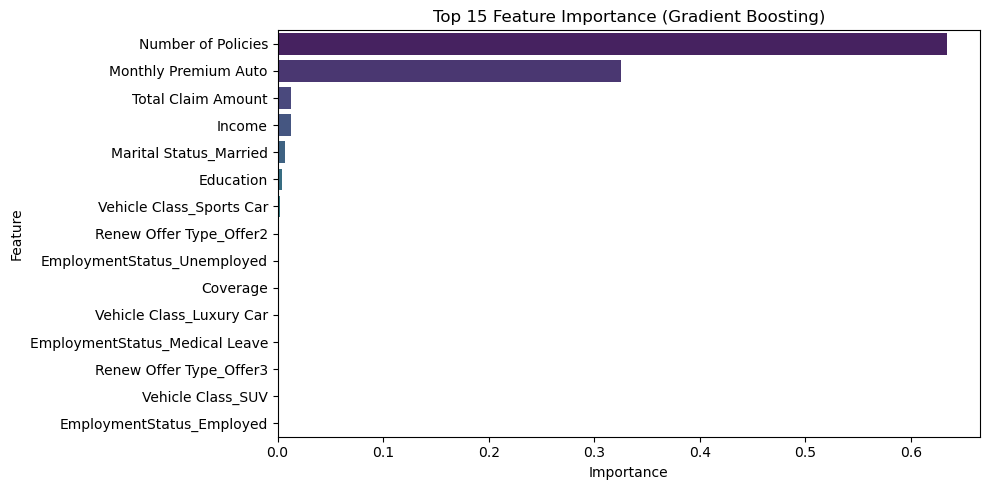

In [98]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=feature_imp.head(15),  # tampilkan 15 fitur teratas, bisa diubah sesuai kebutuhan
    x='imp',
    y='feature',
    palette='viridis'
)
plt.title('Top 15 Feature Importance (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

1. Number of Policies (importance = 0.6339) Ini adalah fitur paling dominan, menyumbang lebih dari 63% dari keseluruhan keputusan model. Artinya, jumlah polis yang dimiliki pelanggan sangat berkorelasi dengan nilai CLV. Semakin banyak polis → semakin loyal → semakin besar potensi CLV.

2. Monthly Premium Auto (importance = 0.3251) Besarnya premi bulanan yang dibayarkan pelanggan juga merupakan faktor penting kedua. Ini menunjukkan bahwa pelanggan yang membayar premi lebih besar per bulan cenderung memiliki CLV yang tinggi.

3. Fitur dengan Pengaruh Rendah (importance < 0.015) Total Claim Amount, Income (~0.013). Meskipun secara logika bisa relevan, kontribusinya sangat kecil dalam prediksi model. Ini bisa berarti bahwa pola klaim tidak terlalu mencerminkan nilai jangka panjang pelanggan. Atau, nilai Income tidak cukup variatif/valid dalam data.

4. Marital Status, Education, Vehicle Class, EmploymentStatus, Renew Offer Type, Coverage → Semuanya memiliki nilai importance di bawah 0.01, bahkan mendekati nol.

### **SHAP (SHapley Additive exPlanations)**

**SHAP** adalah metode interpretasi model berbasis teori permainan Shapley Value dari matematika ekonomi. Untuk satu prediksi, SHAP menghitung berapa besar kontribusi masing-masing fitur jika dibandingkan dengan prediksi rata-rata (baseline). Tidak hanya menunjukkan seberapa sering atau seberapa besar fitur digunakan dalam tree tetapi juga menjelaskan arah dan konteks kontribusinya. SHAP (SHapley Additive exPlanations) memberikan penjelasan yang lebih lengkap dan intuitif terhadap kontribusi setiap fitur terhadap prediksi individu, arah pengaruh fitur (menaikkan atau menurunkan prediksi), dan pentingnya fitur secara global dan lokal (per data point).

In [101]:
import shap

In [119]:
# Ambil X_train yang sudah di-transform
X_train_transformed = tuned_estimator[0].transform(X_train)

# Ubah ke DataFrame agar sesuai dengan feature names
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=list_features)

In [120]:
# Buat explainer
explainer = shap.TreeExplainer(tuned_estimator['model'])

# Hitung SHAP values untuk data training yang sudah diproses
shap_values = explainer.shap_values(X_train_transformed_df)

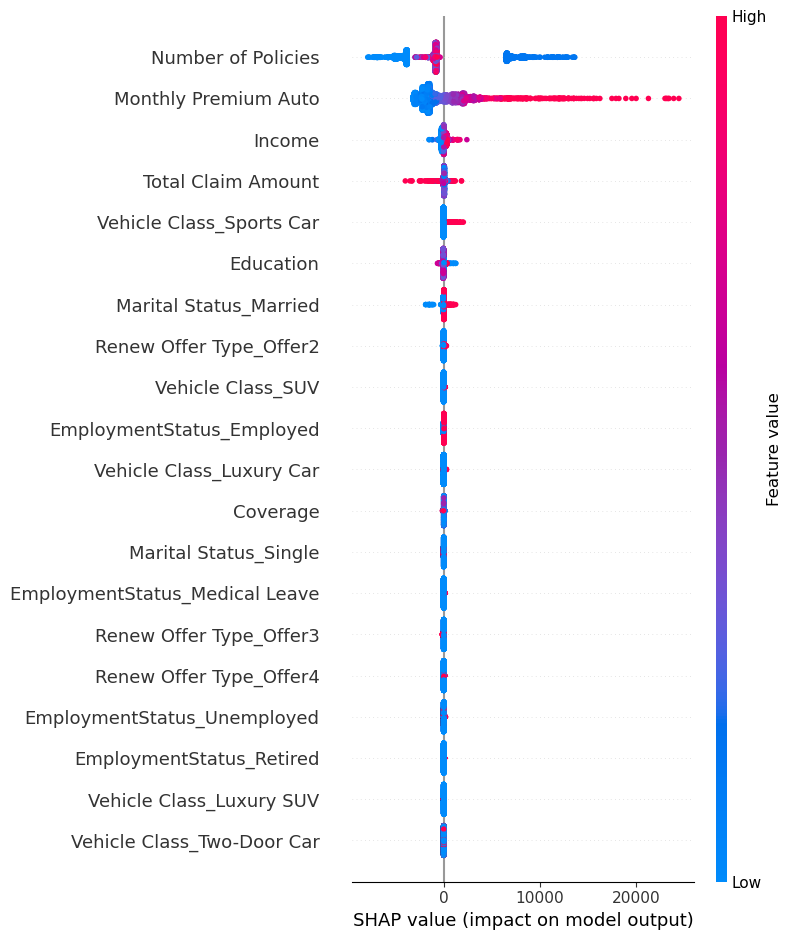

In [121]:
shap.summary_plot(shap_values, X_train_transformed_df)

Insight SHAP:
- Fitur dengan nilai mean(|SHAP|) tertinggi adalah 'Number of Policies' dan 'Monthly Premium Auto', menegaskan hasil feature importance model.
- SHAP summary plot menunjukkan bahwa semakin tinggi 'Number of Policies' dan 'Monthly Premium Auto', prediksi CLV cenderung naik (warna merah di sisi kanan).
- Fitur lain seperti 'Total Claim Amount', 'Income', dan kategori-kategori one-hot memiliki pengaruh jauh lebih kecil terhadap prediksi CLV.
- SHAP juga mengonfirmasi bahwa model cenderung underpredict pada CLV sangat tinggi, terlihat dari sebaran SHAP value yang lebih besar pada nilai fitur tinggi.
- Interpretasi lokal: SHAP dapat digunakan untuk menjelaskan prediksi individu, misal dengan shap.force_plot untuk satu data pelanggan.

mencoba SHAP untuk baris pertama dataset:

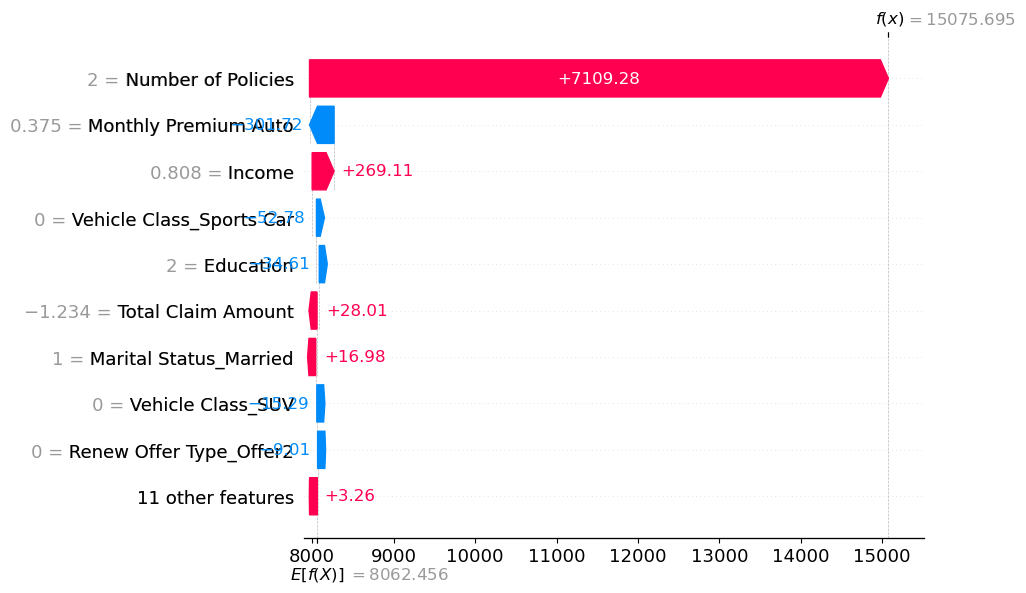

In [130]:
# Ambil SHAP untuk baris pertama
shap_exp = shap.Explanation(values=shap_values[0],
                            base_values=explainer.expected_value,
                            data=X_train_transformed_df.iloc[0],
                            feature_names=X_train_transformed_df.columns)

# Generate the Waterfall Plot
shap.waterfall_plot(shap_exp)


Insight dari Plot Waterfall SHAP

Plot waterfall SHAP untuk baris pertama data menunjukkan bagaimana setiap fitur berkontribusi terhadap prediksi Customer Lifetime Value (CLV) untuk pelanggan tersebut, dimulai dari nilai rata-rata (baseline) model.

1. Fitur dengan kontribusi positif terbesar:  
- Number of Policies (+7109): Jumlah polis yang dimiliki pelanggan ini memberikan kontribusi sangat besar dalam menaikkan prediksi CLV dari baseline. Ini menegaskan bahwa pelanggan dengan lebih banyak polis dianggap sangat bernilai oleh model.
- Income (+269): Pendapatan pelanggan juga sedikit menaikkan prediksi CLV.
- Marital Status_Married (+16.98): Status menikah memberikan kontribusi positif kecil.

2. Fitur dengan kontribusi negatif terbesar: 
- Total Claim Amount (-30172): Jumlah klaim yang relatif besar menurunkan prediksi CLV, meskipun pengaruhnya jauh lebih kecil dibandingkan jumlah polis.
- Monthly Premium Auto (−34.61): Premi bulanan yang tidak terlalu tinggi sedikit menurunkan prediksi CLV.
- Fitur-fitur kategori lain (misal: jenis kendaraan, status pekerjaan) memiliki kontribusi sangat kecil atau hampir nol.


Fitur lain seperti pendapatan, status pernikahan, dan beberapa kategori lain hanya memberi kontribusi kecil. Model sangat sensitif terhadap fitur Number of Policies, sesuai juga dengan hasil feature importance dan summary plot SHAP sebelumnya.

Plot waterfall SHAP sangat membantu untuk menjelaskan secara transparan alasan di balik prediksi model untuk satu pelanggan secara individual.

# <span style="color: #008080;">**V. Conclusion and Recommendation**</span>

## **5.1 Conclusion**

1. **Performa Model Prediksi CLV**
    - Model terbaik untuk prediksi Customer Lifetime Value (CLV) pada data ini adalah Gradient Boosting Regressor yang telah di-tuning menggunakan RobustScaler. Model ini menghasilkan skor R² pada data uji sebesar **0.68** dan RMSE sekitar **3.858**, yang berarti model mampu menjelaskan sekitar 68% variasi CLV pada data pelanggan baru dengan tingkat error yang relatif rendah. Selisih R² antara data latih (0.73) dan data uji (0.68) juga kecil, menandakan model tidak mengalami overfitting dan memiliki kemampuan generalisasi yang baik.
    - Proses tuning hyperparameter (learning_rate, max_depth, n_estimators, subsample, min_samples_split, min_samples_leaf) dan pemilihan metode scaling yang tepat (RobustScaler) terbukti meningkatkan performa model secara signifikan dibanding baseline. Hal ini terlihat dari penurunan RMSE, MAE, dan MAPE, serta kenaikan skor R² setelah tuning.
    - Evaluasi residual dan grafik prediksi vs aktual menunjukkan model cukup akurat untuk segmen pelanggan dengan CLV rendah hingga menengah. Namun, pada pelanggan dengan CLV sangat tinggi (VIP customer), model cenderung underpredict dan error menjadi lebih besar. Fenomena ini umum terjadi pada data dengan distribusi target yang skewed dan keberadaan outlier, namun tetap penting untuk mempertahankan data pelanggan bernilai tinggi agar model dapat belajar mengenali pola mereka.
    - Secara keseluruhan, model sudah cukup baik untuk digunakan dalam prediksi CLV pada rentang data yang tersedia, namun masih terdapat ruang untuk improvement, terutama dalam meningkatkan akurasi prediksi pada pelanggan dengan CLV sangat tinggi.

2. **Fitur-Fitur yang Paling Berpengaruh**
    - Berdasarkan analisis feature importance dari model Gradient Boosting dan interpretasi SHAP, dua fitur yang paling dominan dalam menentukan nilai CLV adalah **Number of Policies** (jumlah polis yang dimiliki pelanggan) dan **Monthly Premium Auto** (besaran premi bulanan). Kedua fitur ini secara konsisten memberikan kontribusi terbesar terhadap prediksi CLV, baik secara global (keseluruhan data) maupun lokal (per individu).
    - Fitur lain seperti **Total Claim Amount** dan **Income** memiliki pengaruh yang jauh lebih kecil terhadap prediksi CLV. Variabel kategori seperti Vehicle Class, Employment Status, Marital Status, Renew Offer Type, Coverage, dan Education juga memiliki nilai importance yang sangat rendah, bahkan mendekati nol. Hal ini menunjukkan bahwa perilaku pelanggan dalam hal jumlah polis dan besaran premi jauh lebih menentukan nilai CLV dibandingkan karakteristik demografis atau kategori produk asuransi yang dimiliki.
    - Hasil analisis korelasi juga mendukung temuan ini, di mana korelasi antara CLV dengan Number of Policies dan Monthly Premium Auto lebih tinggi dibandingkan fitur lainnya. Sementara itu, fitur-fitur lain hanya memberikan kontribusi minor dan tidak terlalu mempengaruhi hasil prediksi model.
    - Interpretasi SHAP memberikan insight tambahan bahwa peningkatan jumlah polis dan premi bulanan secara konsisten menaikkan prediksi CLV, sedangkan fitur lain hanya memberikan efek kecil atau tidak konsisten. SHAP juga membantu menjelaskan prediksi model pada level individu, sehingga dapat digunakan untuk memberikan alasan bisnis di balik prediksi CLV setiap pelanggan.

Model yang dibangun sudah cukup akurat dan robust untuk prediksi CLV, dengan dua fitur utama (jumlah polis dan premi bulanan) sebagai penentu utama nilai pelanggan. Model ini dapat digunakan untuk mendukung pengambilan keputusan bisnis terkait segmentasi, retensi, dan strategi pemasaran berbasis nilai pelanggan.

## **5.2 Recommendation**

**A. Recommendation for Modeling**

1. Improvement Opportunities
- Eksplorasi fitur tambahan, seperti perilaku transaksi, riwayat klaim, atau interaksi pelanggan, untuk meningkatkan akurasi prediksi CLV.
- Coba teknik ensemble lain (misal, LightGBM, CatBoost) atau stacking dengan meta-model berbeda untuk potensi peningkatan performa.
- Lakukan hyperparameter tuning secara berkala, terutama jika ada penambahan data baru.

2. Handling High-Value Customers
- Pertimbangkan untuk membangun model khusus (segmented modeling) untuk pelanggan dengan CLV sangat tinggi (VIP), karena model saat ini cenderung underpredict pada segmen ini.
- Gunakan teknik sampling atau penyesuaian loss function (misal, weighted loss) agar model lebih sensitif terhadap pelanggan bernilai tinggi.

3. Model Maintenance & Monitoring
- Lakukan monitoring performa model secara berkala (misal, setiap 3–6 bulan) untuk mendeteksi penurunan akurasi akibat perubahan pola data (data drift).
- Simpan pipeline preprocessing dan model (seperti yang sudah dilakukan dengan pickle) agar proses deployment dan retraining lebih mudah dan konsisten.

4. Interpretability
- Manfaatkan SHAP untuk interpretasi prediksi individual, terutama saat digunakan untuk pengambilan keputusan bisnis yang berdampak besar pada pelanggan.


**B. Recommendation for Business**

1. Customer Segmentation & Targeting
- Gunakan hasil prediksi CLV untuk melakukan segmentasi pelanggan (misal, low, medium, high value) dan sesuaikan strategi pemasaran, retensi, dan upselling pada tiap segmen.
- Fokuskan program loyalitas dan penawaran khusus pada pelanggan dengan prediksi CLV tinggi untuk meningkatkan retensi dan nilai jangka panjang.

2. Product & Pricing Strategy
- Karena "Number of Policies" dan "Monthly Premium Auto" adalah penentu utama CLV, dorong cross-selling (menambah polis) dan optimalkan strategi pricing premi untuk meningkatkan CLV pelanggan.
- Tawarkan bundling produk atau diskon khusus bagi pelanggan yang menambah polis baru.

3. Retention & Risk Management
- Identifikasi pelanggan dengan CLV rendah dan analisis penyebabnya untuk merancang intervensi retensi yang lebih efektif.
- Pantau pelanggan dengan klaim tinggi namun CLV rendah untuk mengelola risiko dan profitabilitas portofolio.

Harapannya perusahaan dapat memaksimalkan nilai pelanggan, meningkatkan efisiensi pemasaran, dan memperkuat daya saing bisnis berbasis data.

# **Save Model**

In [ ]:
import pickle

pickle.dump(grid, open('model_gradient_boosting_tuned.pkl','wb'))
save_model = pickle.load(open('model_gradient_boosting_tuned.pkl','rb'))

In [134]:
# Load model Gradient Boosting yang sudah di-tuning
loaded_model = pickle.load(open('model_gradient_boosting_tuned.pkl', 'rb'))

**Mengaplikasikan model kepada pelanggan baru**

In [ ]:
# Contoh data pelanggan baru (pastikan urutan kolom sama dengan X_train)
new_customer = pd.DataFrame([{
    'Vehicle Class': 'SUV',
    'EmploymentStatus': 'Employed',
    'Marital Status': 'Single',
    'Renew Offer Type': 'Offer1',
    'Coverage': 'Extended',
    'Education': 'Bachelor',
    'Monthly Premium Auto': 120,
    'Total Claim Amount': 500,
    'Income': 35000,
    'Number of Policies': 2
}])

# Prediksi CLV pelanggan baru menggunakan model yang sudah di-load
predicted_clv = loaded_model.predict(new_customer)
print(f"Prediksi Customer Lifetime Value untuk pelanggan baru: {predicted_clv[0]:.2f}")

*File streamlit untuk mencoba deploy model berada di file terpisah "CLV_prediction.py"*